# AUTOSCOUT CAPSTONE PROJECT

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

**Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

## Handling with Outliers

In [1]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
#from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)
sns.set_theme(font_scale=1.2, style="darkgrid")
#pd.set_option('display.float_format', lambda x: '%.3' % x)

In [2]:
# Reading file zero_NaN CSV
df_origin = pd.read_csv("AutoScout_Zero_NaN", index_col=[0])
df = df_origin.copy()
df.head().T

,0,1,2,3,4
Model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans,Sedans,Sedans
Price,15770.0,14500.0,14640.0,14500.0,16790.0
Vat,VAT deductible,Price negotiable,VAT deductible,No_Discount,No_Discount
Km,56013.0,80000.0,83450.0,73000.0,16200.0
Registration_Date,2016-01-01,2017-03-01,2016-02-01,2016-08-01,2016-05-01
Prev_Owner,2.0,1.0,1.0,1.0,1.0
Type,Used,Used,Used,Used,Used
Body_Color,Black,Red,Black,Brown,Black
Paint_Type,Metallic,Metallic,Metallic,Metallic,Metallic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14433 entries, 0 to 15918
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 14433 non-null  object 
 1   Body_Type             14433 non-null  object 
 2   Price                 14433 non-null  float64
 3   Vat                   14433 non-null  object 
 4   Km                    14433 non-null  float64
 5   Registration_Date     14433 non-null  object 
 6   Prev_Owner            14433 non-null  float64
 7   Type                  14433 non-null  object 
 8   Body_Color            14433 non-null  object 
 9   Paint_Type            14433 non-null  object 
 10  Door_Total            14433 non-null  float64
 11  Seat_Total            14433 non-null  float64
 12  Gear_Type             14433 non-null  object 
 13  Cylinders             14433 non-null  float64
 14  Weight                14433 non-null  float64
 15  Drive_Chain        

In [4]:
df["Registration_Date"] = pd.to_datetime(df["Registration_Date"])

In [5]:
def first_look(col):
    print('column name : ', col)
    print("--"*20)
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Number of Nulls  : ', df[col].isnull().sum())
    print('Number of Uniques: ', df[col].nunique())
    print('Type of columns: ', df[col].dtype)
    print("--"*20)
    print('Unique values of columns: ', df[col].unique())
    print("--"*20)
    print(df[col].value_counts(dropna = False).sort_index())
    print("--"*20)
    print(df[col].value_counts(dropna = False))
    print("##"*40)
    print()

In [6]:
for i in df.columns:
    first_look(i)

column name :  Model
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  9
Type of columns:  object
----------------------------------------
Unique values of columns:  ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
----------------------------------------
Audi A1           2397
Audi A2              1
Audi A3           2813
Opel Astra        2327
Opel Corsa        2055
Opel Insignia     2414
Renault Clio      1506
Renault Duster      34
Renault Espace     886
Name: Model, dtype: int64
----------------------------------------
Audi A3           2813
Opel Insignia     2414
Audi A1           2397
Opel Astra        2327
Opel Corsa        2055
Renault Clio      1506
Renault Espace     886
Renault Duster      34
Audi A2              1
Name: Model, dtype: int64
################################################################################

column name :  Body_Typ

Number of Nulls  :  0
Number of Uniques:  3
Type of columns:  object
----------------------------------------
Unique values of columns:  ['front' '4WD' 'rear']
----------------------------------------
4WD        200
front    14229
rear         4
Name: Drive_Chain, dtype: int64
----------------------------------------
front    14229
4WD        200
rear         4
Name: Drive_Chain, dtype: int64
################################################################################

column name :  Fuel
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  5
Type of columns:  object
----------------------------------------
Unique values of columns:  ['Diesel' 'Benzine' 'Gas' 'Hybrid' 'Electric']
----------------------------------------
Benzine     7746
Diesel      6621
Electric       1
Gas           61
Hybrid         4
Name: Fuel, dtype: int64
----------------------------------------
Benzine     7746
Diesel      6621
Gas           61
Hybrid    

1.0      20
4.0       1
9.0       1
40.0      2
44.0      1
         ..
195.0     1
228.0     2
239.0     1
270.0     2
294.0    18
Name: Hp, Length: 92, dtype: int64
----------------------------------------
85.000000     2303
66.000000     1984
81.000000     1255
100.000000    1228
110.000000    1026
              ... 
65.067774        1
59.485612        1
92.033237        1
115.980668       1
133.000000       1
Name: Hp, Length: 92, dtype: int64
################################################################################

column name :  Particulate_Filter
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  2
Type of columns:  int64
----------------------------------------
Unique values of columns:  [1 0]
----------------------------------------
0    10106
1     4327
Name: Particulate_Filter, dtype: int64
----------------------------------------
0    10106
1     4327
Name: Particulate_Filter, dtype: int64
#####################

### Target Feature - Price

In [7]:
df["Price"].describe()

count    14433.000000
mean     18121.672279
std       7425.909096
min         13.000000
25%      12950.000000
50%      16950.000000
75%      21900.000000
max      74600.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Count'>

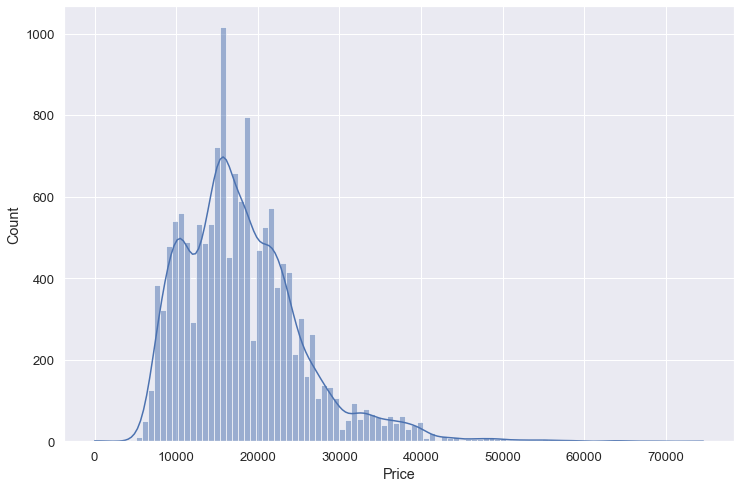

In [8]:
sns.histplot(df["Price"], kde=True)

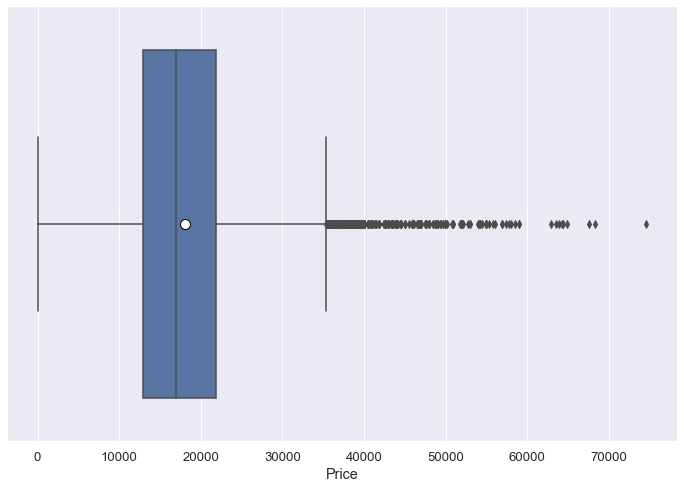

In [9]:
sns.boxplot(data=df, 
            x="Price",
            showmeans=True,
            
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

In [10]:
price_min_index = df[df["Price"] < 1000].index
df[df["Price"] < 1000]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
6066,Opel Astra,Station wagon,255.0,No_Discount,5563.0,2018-06-01,1.0,Used,Gold,Metallic,5.0,5.0,Manual,4.0,1403.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Roof rack,"ABS,Central door lock with remote control,Dayt...",6.0,3.800000,100.0,1,0,101.000000,Unknown,Unknown,1.6,1.0,"(0, 10000]","(5000, 15000]","(1400, 1600]","(90, 100]","(100, 120]"
8594,Opel Corsa,Sedans,13.0,No_Discount,123.0,2018-06-01,0.0,Used,Gold,Metallic,3.0,5.0,Manual,4.0,1141.0,front,Benzine,Euro 6d,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive headlights,Central door lock with...",5.0,5.600000,66.0,0,0,128.000000,Unknown,Unknown,1.4,1.0,"(0, 10000]","(-1, 5000]","(1000, 1200]","(60, 70]","(120, 140]"
8828,Opel Corsa,Compact,120.0,No_Discount,12.0,2019-01-01,0.0,New,Grey,Metallic,5.0,5.0,Manual,3.0,1099.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Digital radio,On-board computer,Radio","Alloy wheels,Sport suspension","Central door lock,Daytime running lights,Drive...",6.0,4.600000,66.0,0,0,107.000000,Cloth,Black,1.0,0.0,"(0, 10000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100, 120]"
8829,Opel Corsa,Other,331.0,No_Discount,10.0,2019-01-01,0.0,New,White,Metallic,5.0,5.0,Manual,3.0,1163.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,On-board computer,Radio","Alloy wheels,Sport package","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.585566,66.0,0,0,131.427287,Cloth,Black,1.0,0.0,"(0, 10000]","(-1, 5000]","(1000, 1200]","(60, 70]","(120, 140]"


In [11]:
df.loc[price_min_index,"Price"] = df.groupby(["Model","Km_Interval","Hp_Interval","Age","Body_Type"])["Price"].transform(lambda x : x.mean())[price_min_index].values
df.loc[price_min_index,"Price"]

6066    16049.000000
8594    12895.535714
8828    15532.125899
8829    11395.500000
Name: Price, dtype: float64

In [12]:
#When we look more than 40000, we see that these values are not outlier.
df[df["Price"] > 40000][["Model","Age"]].value_counts()

Model           Age
Renault Espace  0.0    103
Opel Insignia   0.0     26
Audi A3         1.0     14
                2.0      4
                0.0      3
                3.0      2
dtype: int64

In [13]:
df[df["Price"] > 60000]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
3587,Audi A3,Sedans,64900.0,No_Discount,35000.0,2018-04-01,1.0,Used,Grey,Metallic,5.0,5.0,Semi-automatic,5.0,1585.000000,front,Benzine,Euro 6,"Air conditioning,Seat ventilation,Split rear s...",Radio,Alloy wheels,"Adaptive Cruise Control,Alarm system,Central d...",7.0,8.300000,294.0,0,0,189.000000,Unknown,Unknown,2.5,1.0,"(30000, 80000]","(30000, 60000]","(1400, 1600]","(120, 350]","(160, 200]"
3590,Audi A3,Sedans,62900.0,No_Discount,700.0,2019-03-01,1.0,Used,Grey,Metallic,5.0,5.0,Semi-automatic,5.0,1585.000000,front,Benzine,Euro 6d,"Air conditioning,Seat ventilation,Split rear s...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive Cruise Control,Alarm system,Centr...",7.0,8.300000,294.0,0,0,194.000000,Unknown,Unknown,2.5,0.0,"(30000, 80000]","(-1, 5000]","(1400, 1600]","(120, 350]","(160, 200]"
3595,Audi A3,Station wagon,63900.0,VAT deductible,10.0,2019-06-01,1.0,Used,Black,Metallic,5.0,5.0,Semi-automatic,5.0,1585.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Shift paddles,Ski bag,Sport packa...","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,8.300000,294.0,0,0,189.000000,Part leather,Black,2.5,0.0,"(30000, 80000]","(-1, 5000]","(1400, 1600]","(120, 350]","(160, 200]"
3648,Audi A3,Sedans,74600.0,VAT deductible,13000.0,2018-05-01,1.0,Used,Black,Metallic,4.0,5.0,Semi-automatic,5.0,1490.000000,4WD,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Sport seats,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",7.0,8.300000,294.0,0,0,188.000000,Full leather,Grey,2.5,1.0,"(30000, 80000]","(5000, 15000]","(1400, 1600]","(120, 350]","(160, 200]"
3649,Audi A3,Compact,67600.0,VAT deductible,37747.0,2017-10-01,1.0,Used,White,Metallic,5.0,5.0,Semi-automatic,5.0,1485.000000,4WD,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",7.0,8.300000,294.0,0,0,189.000000,Full leather,Black,2.5,2.0,"(30000, 80000]","(30000, 60000]","(1400, 1600]","(120, 350]","(160, 200]"
15826,Renault Espace,Van,68320.0,VAT deductible,4307.0,2019-01-01,1.0,Demonstration,Black,Metallic,5.0,4.0,Automatic,4.0,1746.766423,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack","ABS,Adaptive Cruise Control,Adaptive headlight...",7.0,6.500000,118.0,1,0,120.000000,Full leather,Brown,1.6,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(100, 120]","(100, 120]"
15828,Renault Espace,Van,64332.0,VAT deductible,1.0,2019-01-01,0.0,New,Grey,Metallic,5.0,7.0,Automatic,4.0,1647.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",7.0,7.600000,165.0,0,0,156.295337,Full leather,Unknown,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(120, 350]","(140, 160]"
15831,Renault Espace,Van,64298.0,VAT deductible,15.0,2019-01-01,0.0,New,White,Metallic,5.0,7.0,Automatic,4.0,1647.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Alarm system,Blind spot monitor,Daytime ru...",6.0,7.600000,165.0,0,0,156.295337,Full leather,Grey,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(120, 350]

### Numerical Features

In [14]:
df.select_dtypes(exclude="O").describe().T

,count,mean,std,min,25%,50%,75%,max
Price,14433.0,18125.493602,7420.288059,4950.0,12950.0,16950.000000,21900.0,74600.0
Km,14433.0,31922.466859,36849.589485,0.0,3000.0,20455.000000,46000.0,317000.0
Prev_Owner,14433.0,0.842860,0.479167,0.0,1.0,1.000000,1.0,4.0
Door_Total,14433.0,4.659045,0.641504,1.0,4.0,5.000000,5.0,7.0
Seat_Total,14433.0,4.950461,0.461486,2.0,5.0,5.000000,5.0,7.0
Cylinders,14433.0,3.806624,0.404664,1.0,4.0,4.000000,4.0,8.0
Weight,14433.0,1357.155057,207.049573,1.0,1180.0,1320.530435,1475.0,2471.0
Gears,14433.0,5.854777,0.781384,1.0,5.0,6.000000,6.0,50.0
Consumption,14433.0,4.892429,1.602418,0.0,4.1,4.800000,5.4,55.0
Hp,14433.0,88.502857,26.683781,1.0,66.0,85.000000,103.0,294.0


In [15]:
df.select_dtypes(exclude="O").corr().abs()

,Price,Km,Prev_Owner,Door_Total,Seat_Total,Cylinders,Weight,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Engine_Size,Age
Price,1.000000,0.399832,0.290033,0.155939,0.238830,0.036487,0.453472,0.483846,0.157576,0.694940,0.064733,0.002165,0.321899,0.278306,0.474104
Km,0.399832,1.000000,0.394502,0.009399,0.011892,0.201106,0.181999,0.011188,0.197733,0.011623,0.256271,0.032023,0.193613,0.310821,0.753253
Prev_Owner,0.290033,0.394502,1.000000,0.108039,0.053067,0.100923,0.048722,0.048554,0.123893,0.032927,0.076675,0.067294,0.130965,0.132772,0.585553
Door_Total,0.155939,0.009399,0.108039,1.000000,0.111226,0.055625,0.138654,0.141600,0.017455,0.120851,0.028834,0.119633,0.031425,0.086287,0.092271
Seat_Total,0.238830,0.011892,0.053067,0.111226,1.000000,0.252580,0.309758,0.123587,0.122866,0.282365,0.041407,0.007403,0.246672,0.195633,0.085715
Cylinders,0.036487,0.201106,0.100923,0.055625,0.252580,1.000000,0.298439,0.121989,0.095211,0.276767,0.147519,0.048147,0.310997,0.624044,0.144191
Weight,0.453472,0.181999,0.048722,0.138654,0.309758,0.298439,1.000000,0.393009,0.042766,0.653788,0.287982,0.023280,0.278629,0.627020,0.086910
Gears,0.483846,0.011188,0.048554,0.141600,0.123587,0.121989,0.393009,1.000000,0.010418,0.474756,0.182580,0.030303,0.143748,0.367471,0.066083
Consumption,0.157576,0.197733,0.123893,0.017455,0.122866,0.095211,0.042766,0.010418,1.000000,0.202993,0.189265,0.060636,0.516813,0.000593,0.222182
Hp,0.694940,0.011623,0.032927,0.120851,0.282365,0.276767,0.653788,0.474756,0.202993,1.000000,0.146782,0.048041,0.487144,0.603276,0.087783


#### Km

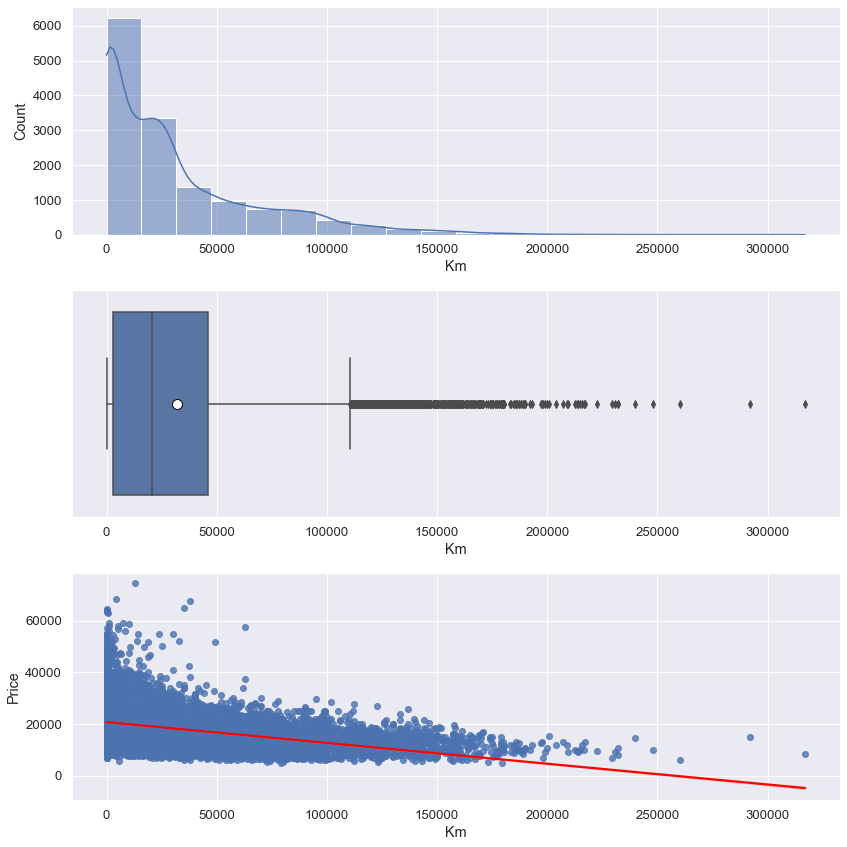

In [16]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Km"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Km",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Km", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [17]:
df["Km"].describe()

count     14433.000000
mean      31922.466859
std       36849.589485
min           0.000000
25%        3000.000000
50%       20455.000000
75%       46000.000000
max      317000.000000
Name: Km, dtype: float64

In [18]:
df[df["Km"]>200000].sample(5)

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
10495,Opel Insignia,Station wagon,9500.0,VAT deductible,222346.0,2016-05-01,1.0,Used,Grey,Metallic,4.0,5.0,Manual,4.0,1697.718121,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Roof rack,Touch screen,Trailer hi...","ABS,Adaptive headlights,Blind spot monitor,Cen...",6.0,4.50000,125.0,1,0,119.000000,Cloth,Black,2.0,3.0,"(0, 10000]","(100000, 350000]","(1600, 1800]","(120, 350]","(100, 120]"
3228,Audi A3,Station wagon,11790.0,VAT deductible,209000.0,2016-06-01,1.0,Used,Silver,Metallic,4.0,5.0,Manual,4.0,1403.990800,front,Diesel,Euro 6,"Air conditioning,Armrest,Cruise control,Electr...","Bluetooth,CD player,Hands-free equipment,On-bo...",Voice Control,"ABS,Central door lock,Daytime running lights,D...",6.0,3.80000,81.0,1,1,101.000000,Cloth,Black,1.6,3.0,"(10000, 15000]","(100000, 350000]","(1400, 1600]","(80, 90]","(100, 120]"
2987,Audi A3,Sedans,12850.0,VAT deductible,207000.0,2016-03-01,1.0,Used,Blue,Metallic,5.0,5.0,Automatic,4.0,1400.000000,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Alarm system,Central door lock,Central doo...",6.0,4.50000,110.0,0,0,119.000000,Part leather,Black,2.0,3.0,"(10000, 15000]","(100000, 350000]","(1200, 1400]","(100, 120]","(100, 120]"
10856,Opel Insignia,Station wagon,9490.0,VAT deductible,213687.0,2016-04-01,1.0,Used,Black,Metallic,4.0,5.0,Automatic,4.0,1594.253138,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,On-board computer,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.04151,100.0,1,0,122.797619,Full leather,Grey,1.6,3.0,"(0, 10000]","(100000, 350000]","(1400, 1600]","(90, 100]","(120, 140]"
9279,Opel Corsa,Sedans,8350.0,No_Discount,317000.0,2017-11-01,1.0,Used,Red,Metallic,3.0,5.0,Manual,4.0,1199.000000,front,Benzine,Euro 6d,"Air conditioning,Hill Holder,Power windows",On-board computer,Alloy wheels,"ABS,Central door lock with remote control,Dayt...",5.0,6.00000,66.0,0,0,136.000000,Unknown,Unknown,1.4,2.0,"(0, 10000]","(100000, 350000]","(1000, 1200]","(60, 70]","(120, 140]"


In [19]:
df["Km_Interval"] =pd.cut(df["Km"], bins=[-1,5000,15000,30000,60000,100000,350000])
df["Km_Interval"].value_counts()

(-1, 5000]          4111
(15000, 30000]      3330
(30000, 60000]      2330
(5000, 15000]       1971
(60000, 100000]     1818
(100000, 350000]     873
Name: Km_Interval, dtype: int64

#### Prev_Owner

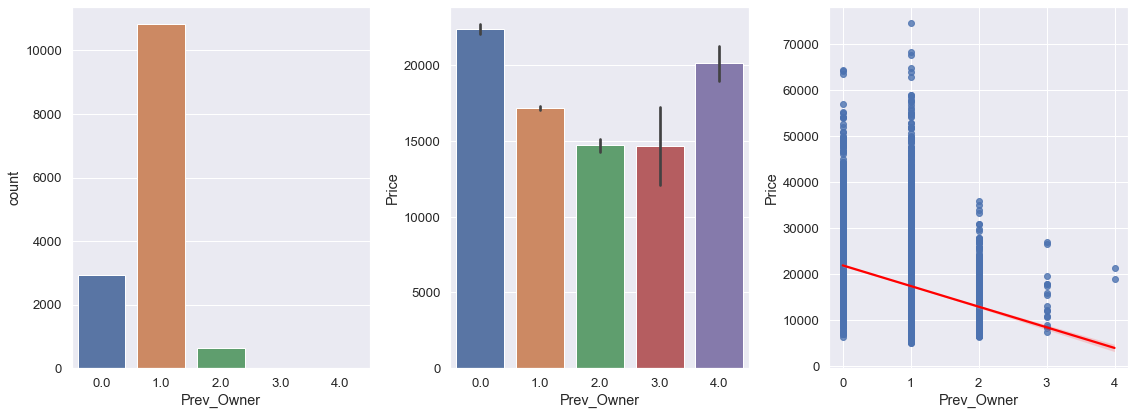

In [20]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Prev_Owner"],ax=ax[0]);
sns.barplot(x="Prev_Owner", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Prev_Owner", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [21]:
df["Prev_Owner"].describe()

count    14433.000000
mean         0.842860
std          0.479167
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: Prev_Owner, dtype: float64

In [22]:
df[df["Prev_Owner"] > 2]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
679,Audi A1,Compact,11990.0,No_Discount,45000.0,2016-04-01,3.0,Used,White,Metallic,2.0,4.0,Manual,3.0,1179.635135,front,Benzine,Euro 6,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",5.0,4.40000,60.0,0,1,102.000000,Part leather,Black,1.0,3.0,"(10000, 15000]","(30000, 60000]","(1000, 1200]","(50, 60]","(100, 120]"
972,Audi A1,Sedans,21300.0,Price negotiable,19700.0,2017-12-01,4.0,Used,Blue,Metallic,5.0,4.0,Automatic,4.0,1215.000000,front,Benzine,Euro 6,"Leather steering wheel,Lumbar support,Power wi...",Radio,"Alloy wheels,Sport seats","ABS,Central door lock with remote control,Dayt...",7.0,4.90000,92.0,0,0,112.000000,Unknown,Unknown,1.4,2.0,"(20000, 25000]","(15000, 30000]","(1200, 1400]","(90, 100]","(100, 120]"
1290,Audi A1,Sedans,15480.0,VAT deductible,18890.0,2017-03-01,3.0,Used,Black,Metallic,4.0,5.0,Manual,3.0,1183.580952,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Ele...","Bluetooth,CD player,Hands-free equipment,On-bo...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,4.20000,70.0,0,1,97.000000,Cloth,Black,1.0,2.0,"(15000, 20000]","(15000, 30000]","(1000, 1200]","(60, 70]","(0, 100]"
2729,Audi A3,Station wagon,17900.0,No_Discount,27600.0,2016-05-01,3.0,Used,Silver,Metallic,5.0,5.0,Automatic,4.0,1300.000000,front,Benzine,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...","On-board computer,Bluetooth,Radio",Alloy wheels,"ABS,Central door lock with remote control,Driv...",7.0,4.90000,92.0,0,0,113.000000,Unknown,Unknown,1.4,3.0,"(15000, 20000]","(15000, 30000]","(1200, 1400]","(90, 100]","(100, 120]"
3269,Audi A3,Station wagon,13100.0,VAT deductible,116000.0,2016-02-01,3.0,Used,Blue,Metallic,5.0,5.0,Manual,4.0,1335.000000,front,Diesel,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...",On-board computer,"Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock with remote control,Driv...",6.0,4.00000,81.0,0,0,105.000000,Unknown,Unknown,1.6,3.0,"(10000, 15000]","(100000, 350000]","(1200, 1400]","(80, 90]","(100, 120]"
6103,Opel Astra,Station wagon,10598.0,No_Discount,56500.0,2016-07-01,3.0,Used,Silver,Metallic,4.0,5.0,Manual,4.0,1431.876000,front,Diesel,Euro 5,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Voice Control","ABS,Adaptive headlights,Central door lock,Dayt...",6.0,3.90000,100.0,1,0,103.000000,Part leather,Black,1.6,3.0,"(10000, 15000]","(30000, 60000]","(1400, 1600]","(90, 100]","(100, 120]"
6406,Opel Astra,Station wagon,10890.0,No_Discount,63699.0,2016-02-01,3.0,Used,White,Metallic,4.0,5.0,Manual,4.0,1408.809249,front,Benzine,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,CD player,Hands-free equipment,On-bo...",Roof rack,"ABS,Central door lock,Daytime running lights,D...",5.0,6.30000,85.0,0,1,149.000000,Cloth,Black,1.6,3.0,"(10000, 15000]","(60000, 100000]","(1400, 1600]","(80, 90]","(140, 160]"
6669,Opel Astra,Station wagon,17400.0,No_Discount,62000.0,2017-06-01,3.0,Used,Silver,Metallic,5.0,5.0,Automatic,4.0,1350.000000,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Roof rack,Touch screen,Voice Control","ABS,Central door lock with remote control,Dayt...",6.0,5.40000,110.0,0,0,125.000000,Unknown,Unknown,1.4,2.0,"(15000, 20000]","(60000, 100000]","(1200, 1400]","(100, 120]","(120, 1

####  Door_Total

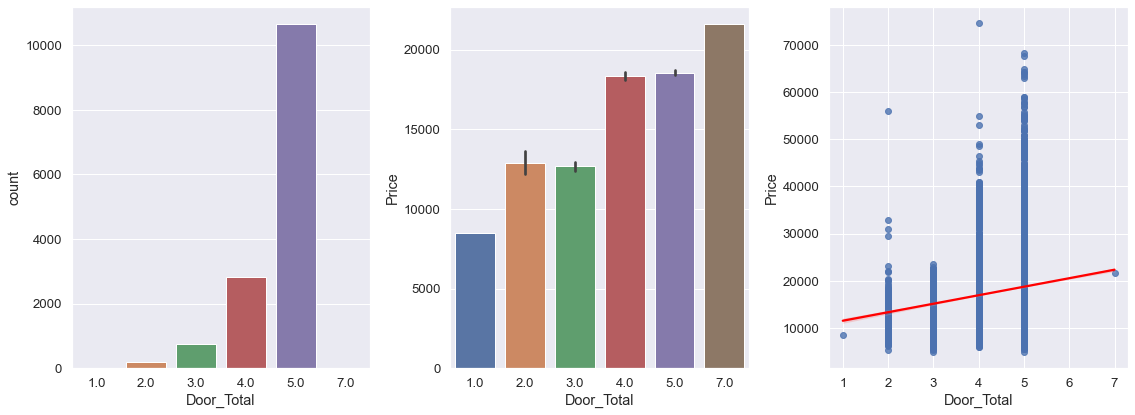

In [23]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Door_Total"],ax=ax[0]);
sns.barplot(x="Door_Total", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Door_Total", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [24]:
df[df["Door_Total"] == 1]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
13782,Renault Clio,Compact,8500.0,VAT deductible,41493.0,2016-01-01,1.0,Used,White,Metallic,1.0,5.0,Manual,4.0,1169.759777,front,Diesel,Euro 6,"Leather steering wheel,Start-stop system,Multi...","Radio,Bluetooth,On-board computer",Alloy wheels,"Tire pressure monitoring system,Isofix,Power s...",5.0,3.585075,55.0,0,0,89.136842,Unknown,Unknown,1.5,3.0,"(0, 10000]","(30000, 60000]","(1000, 1200]","(50, 60]","(0, 100]"


In [25]:
df.loc[df["Door_Total"] == 1,"Door_Total"] = 2

In [26]:
df[df["Door_Total"] == 7]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Door_Total,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
15202,Renault Espace,Van,21600.0,Price negotiable,78000.0,2016-04-01,1.0,Used,Brown,Metallic,7.0,5.0,Automatic,4.0,1734.0,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,MP3,On-board computer,...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,4.6,118.0,0,0,120.0,Full leather,Brown,1.6,3.0,"(20000, 25000]","(60000, 100000]","(1600, 1800]","(100, 120]","(100, 120]"


In [27]:
df.loc[df["Door_Total"] == 7,"Door_Total"] = df[df["Model"] == "Renault Espace"]["Door_Total"].mode()[0]

In [28]:
df[(df["Body_Type"] == "Sedans") & (df["Door_Total"] == 3)]["Model"].value_counts()

Opel Corsa    143
Audi A1       130
Audi A3        85
Opel Astra      3
Name: Model, dtype: int64

In [29]:
df[df["Door_Total"] == 3][["Body_Type"]].value_counts(dropna=False)

Body_Type    
Compact          366
Sedans           361
Coupe             17
Other              7
Transporter        4
Station wagon      2
dtype: int64

In [30]:
df.loc[(df["Body_Type"] == "Sedans") & (df["Door_Total"] == 3), "Door_Total"] = df[df["Body_Type"] == "Sedans"]["Door_Total"].mode()[0]

In [31]:
df["Door_Total"].value_counts(dropna=False)

5.0    11019
4.0     2823
3.0      396
2.0      195
Name: Door_Total, dtype: int64

In [32]:
df.corr()["Door_Total"]

Price                   0.119362
Km                     -0.005452
Prev_Owner             -0.079091
Door_Total              1.000000
Seat_Total              0.069533
Cylinders               0.035654
Weight                  0.092025
Gears                   0.123692
Consumption            -0.028742
Hp                      0.074477
Particulate_Filter      0.003659
Inspection_Situation   -0.134446
Emission               -0.056285
Engine_Size             0.062606
Age                    -0.047221
Name: Door_Total, dtype: float64

In [33]:
#According to corelation and graphs there is no enough relationship with (target feature) price
df.drop(columns="Door_Total", inplace=True)

#### Seat_Total

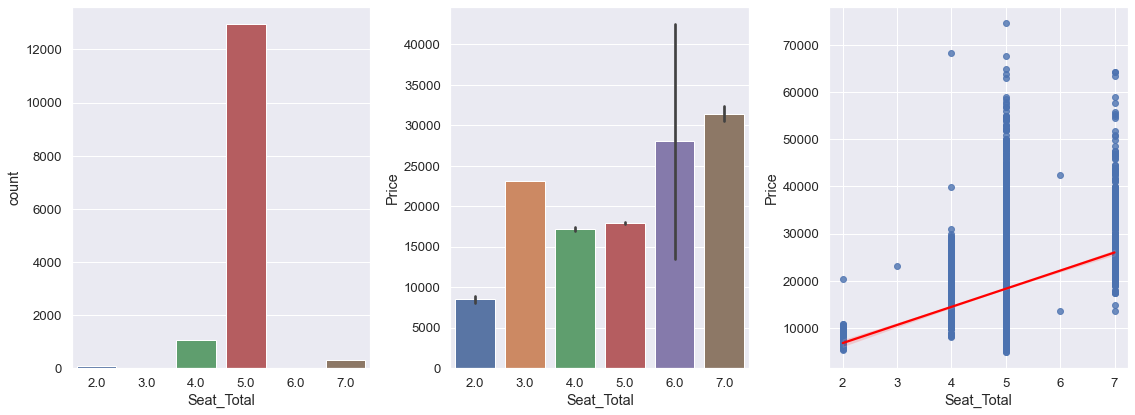

In [34]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Seat_Total"],ax=ax[0]);
sns.barplot(x="Seat_Total", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Seat_Total", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [35]:
df[df["Seat_Total"] == 3]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
1636,Audi A1,Compact,23090.0,No_Discount,9821.0,2018-06-01,1.0,Used,Black,Metallic,3.0,Automatic,4.0,1323.75,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Sport package...","ABS,Central door lock,Daytime running lights,D...",7.0,5.8,141.0,0,1,134.0,Part leather,Black,1.8,1.0,"(20000, 25000]","(5000, 15000]","(1200, 1400]","(120, 350]","(120, 140]"


In [36]:
df.loc[df["Seat_Total"] == 3, "Seat_Total"] = df[(df["Model"] == "Audi A1") & (df["Body_Type"] == "Compact")]["Seat_Total"].mode()[0]

In [37]:
df[df["Seat_Total"] == 6]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
582,Audi A1,Compact,13500.0,VAT deductible,100000.000000,2017-01-01,1.0,Used,White,Metallic,6.0,Manual,4.0,1500.0,front,Benzine,Euro 6,Air conditioning,On-board computer,Alloy wheels,ABS,5.0,4.746401,70.0,0,0,101.705531,Unknown,Unknown,1.0,2.0,"(10000, 15000]","(60000, 100000]","(1400, 1600]","(60, 70]","(100, 120]"
15890,Renault Espace,Station wagon,42490.0,VAT deductible,13.135135,2019-01-01,0.0,New,Black,Metallic,6.0,Automatic,4.0,1840.0,front,Diesel,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",6.0,5.700000,147.0,1,0,168.000000,Cloth,Other,2.0,0.0,"(30000, 80000]","(-1, 5000]","(1800, 3000]","(120, 350]","(160, 200]"


In [38]:
for indexes in df[df["Seat_Total"] == 6].index:
    df.loc[indexes, "Seat_Total"] = df[(df["Model"] == df["Model"][indexes]) & (df["Body_Type"] == df["Body_Type"][indexes])]["Seat_Total"].mode()[0]


In [39]:
df[df["Seat_Total"] == 7]["Model"].value_counts()

Renault Espace    311
Name: Model, dtype: int64

In [40]:
df[df["Seat_Total"] == 2][["Model","Body_Type"]].value_counts()

Model          Body_Type    
Renault Clio   Sedans           45
               Transporter      25
               Compact           5
Opel Corsa     Transporter       4
Renault Clio   Other             4
               Van               2
Opel Corsa     Coupe             1
Opel Insignia  Station wagon     1
dtype: int64

#### Cylinders

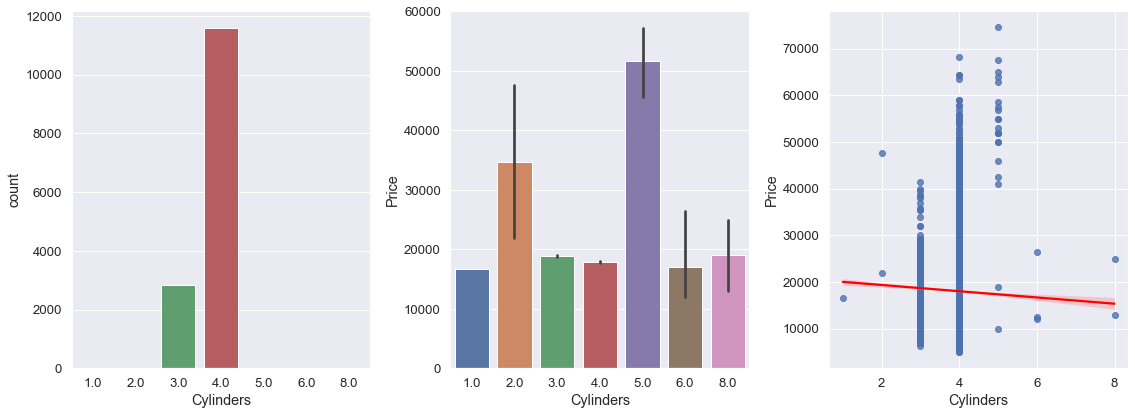

In [41]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Cylinders"],ax=ax[0]);
sns.barplot(x="Cylinders", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Cylinders", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [42]:
df[df["Cylinders"] < 3]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
9956,Opel Corsa,Compact,16625.0,VAT deductible,100.0,2019-04-01,0.0,Pre-registered,Black,Metallic,5.0,Automatic,1.0,1163.00000,front,Benzine,Euro 6d,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Sport suspension","ABS,Central door lock,Daytime running lights,D...",6.0,6.00000,66.0,0,0,140.000000,Cloth,Black,1.4,0.0,"(15000, 20000]","(-1, 5000]","(1000, 1200]","(60, 70]","(120, 140]"
11342,Opel Insignia,Station wagon,21900.0,VAT deductible,13600.0,2018-05-01,1.0,Employee's car,Grey,Metallic,5.0,Automatic,2.0,1697.18604,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen,...","ABS,Central door lock with remote control,Driv...",6.0,5.04151,100.0,1,0,122.797619,Part leather,Black,2.0,1.0,"(20000, 25000]","(5000, 15000]","(1600, 1800]","(90, 100]","(120, 140]"
15835,Renault Espace,Van,47590.0,VAT deductible,6000.0,2019-02-01,1.0,Employee's car,Black,Metallic,7.0,Automatic,2.0,1840.00000,front,Diesel,Euro 6d,"Air conditioning,Automatic climate control,Ele...","Bluetooth,Hands-free equipment,On-board comput...",Voice Control,"ABS,Alarm system,Blind spot monitor,Central do...",6.0,5.30000,147.0,1,0,139.000000,Full leather,Brown,2.0,0.0,"(30000, 80000]","(5000, 15000]","(1800, 3000]","(120, 350]","(120, 140]"


In [43]:
df.groupby(["Model"])["Cylinders"].value_counts()

Model           Cylinders
Audi A1         3.0          1958
                4.0           438
                8.0             1
Audi A2         4.0             1
Audi A3         4.0          2274
                3.0           518
                5.0            21
Opel Astra      4.0          2157
                3.0           170
Opel Corsa      4.0          2045
                3.0             9
                1.0             1
Opel Insignia   4.0          2410
                6.0             3
                2.0             1
Renault Clio    4.0          1340
                3.0           165
                5.0             1
Renault Duster  4.0            34
Renault Espace  4.0           884
                2.0             1
                8.0             1
Name: Cylinders, dtype: int64

In [44]:
df[df["Cylinders"].isin([6,8])]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
535,Audi A1,Compact,12990.0,No_Discount,41200.0,2016-02-01,1.0,Used,Silver,Metallic,5.0,Manual,8.0,1183.580952,front,Benzine,Euro 4,"Air conditioning,Automatic climate control,Ele...","On-board computer,Bluetooth,Radio","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.0,13.800000,70.0,0,1,331.000000,Cloth,Black,1.0,3.0,"(10000, 15000]","(30000, 60000]","(1000, 1200]","(60, 70]","(200, 1000]"
10771,Opel Insignia,Station wagon,12000.0,Price negotiable,185000.0,2016-02-01,1.0,Used,White,Metallic,5.0,Automatic,6.0,2295.000000,front,Diesel,Euro 4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,9.100000,100.0,0,0,239.000000,Unknown,Unknown,3.0,3.0,"(10000, 15000]","(100000, 350000]","(1800, 3000]","(90, 100]","(200, 1000]"
10826,Opel Insignia,Station wagon,12500.0,Price negotiable,77500.0,2017-03-01,1.0,Used,Grey,Metallic,5.0,Automatic,6.0,1594.253138,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,...",7.0,5.400000,100.0,0,0,129.000000,Unknown,Unknown,1.6,2.0,"(10000, 15000]","(60000, 100000]","(1400, 1600]","(90, 100]","(120, 140]"
12897,Opel Insignia,Sedans,26500.0,VAT deductible,5.0,2019-03-01,1.0,Used,Grey,Uni/basic,5.0,Manual,6.0,1594.253138,front,Diesel,Euro 6d,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.041510,100.0,1,0,122.797619,Full leather,Black,1.6,0.0,"(25000, 30000]","(-1, 5000]","(1400, 1600]","(90, 100]","(120, 140]"
15055,Renault Espace,Van,24990.0,No_Discount,47423.0,2017-01-01,1.0,Used,Black,Metallic,5.0,Automatic,8.0,1240.862172,front,Diesel,Euro 6,Park Distance Control,"On-board computer,Radio,Bluetooth",Alloy wheels,"Central door lock,Tire pressure monitoring sys...",6.0,4.834012,117.0,0,0,122.086111,Unknown,Unknown,1.0,2.0,"(20000, 25000]","(30000, 60000]","(1200, 1400]","(100, 120]","(120, 140]"


In [45]:
for indexes in df[df["Cylinders"].isin([1,2,8])].index:
    df.loc[indexes, "Cylinders"] = df[(df["Model"] == df["Model"][indexes]) & (df["Engine_Size"] == df["Engine_Size"][indexes])]["Cylinders"].mode()[0]

In [46]:
for indexes in df[df["Cylinders"] == 8].index:
    df.loc[indexes, "Cylinders"] = df[(df["Model"] == df["Model"][indexes])]["Cylinders"].mode()[0]
    

#### Weight

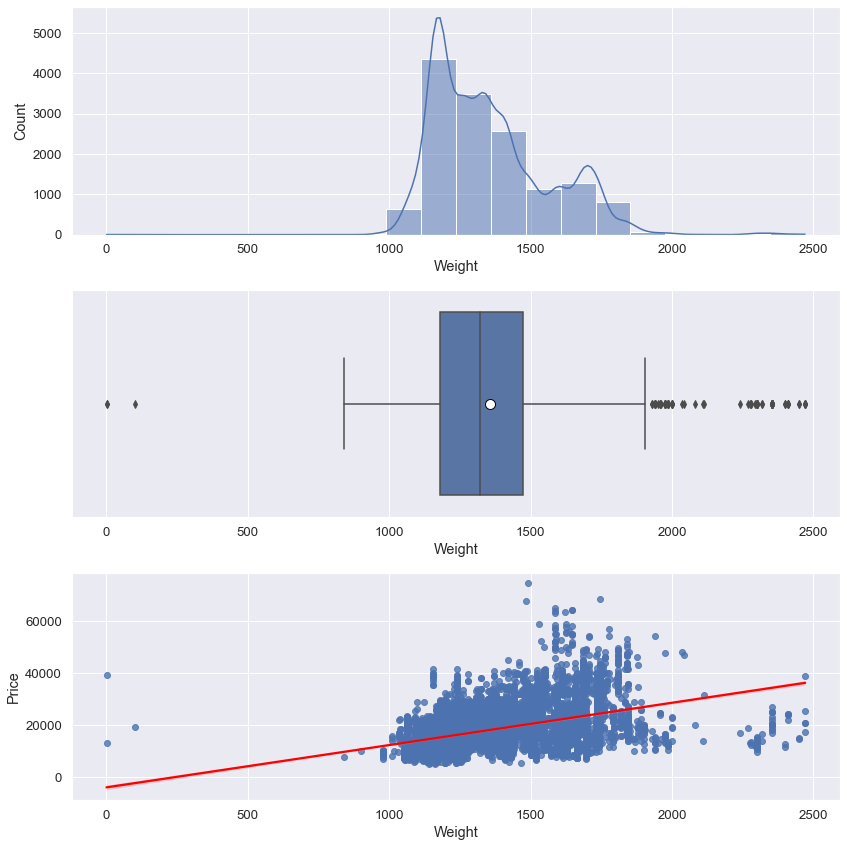

In [47]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Weight"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Weight",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Weight", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [48]:
df["Weight"].describe()

count    14433.000000
mean      1357.155057
std        207.049573
min          1.000000
25%       1180.000000
50%       1320.530435
75%       1475.000000
max       2471.000000
Name: Weight, dtype: float64

In [49]:
weight_min_index = df[df["Weight"] < 500].index
df[df["Weight"] < 500]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
1143,Audi A1,Compact,19229.0,VAT deductible,8263.0,2018-05-01,1.0,Used,Beige,Metallic,4.0,Automatic,3.0,102.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Sport seats,S...","ABS,Central door lock,Daytime running lights,D...",7.0,4.600000,70.0,0,1,102.000000,Cloth,Black,1.0,1.0,"(15000, 20000]","(5000, 15000]","(0, 1000]","(60, 70]","(100, 120]"
8355,Opel Corsa,Compact,12945.0,No_Discount,2015.0,2018-01-01,1.0,Used,Silver,Metallic,5.0,Automatic,4.0,1.0,front,Benzine,Euro 6,"Air conditioning,Electrical side mirrors,Hill ...",Radio,Catalytic Converter,"ABS,Central door lock,Daytime running lights,D...",5.0,4.800000,66.0,0,1,112.000000,Cloth,Black,1.4,1.0,"(10000, 15000]","(-1, 5000]","(0, 1000]","(60, 70]","(100, 120]"
12779,Opel Insignia,Station wagon,39299.0,VAT deductible,10.0,2019-01-01,0.0,New,Black,Metallic,5.0,Manual,4.0,1.0,front,Benzine,Euro 6d,"Heated steering wheel,Hill Holder,Park Distanc...","Hands-free equipment,Radio,Bluetooth,On-board ...","Touch screen,Alloy wheels","Fog lights,Lane departure warning system",6.0,6.105299,121.0,0,0,143.242775,Cloth,Black,1.5,0.0,"(30000, 80000]","(-1, 5000]","(0, 1000]","(120, 350]","(140, 160]"


In [50]:
df.loc[weight_min_index,"Weight"] = round(df.groupby(["Model","Body_Type","Engine_Size"])["Weight"].transform(lambda x : x.mean()))[weight_min_index].values
df.loc[weight_min_index,"Weight"]

1143     1181.0
8355     1174.0
12779    1485.0
Name: Weight, dtype: float64

In [51]:
df[df["Weight"] > 1900]["Model"].value_counts()

Opel Insignia     45
Renault Espace    28
Opel Astra        20
Audi A3            1
Opel Corsa         1
Name: Model, dtype: int64

In [52]:
df[df["Model"] == "Opel Corsa"]["Weight_Interval"].value_counts()

(1000, 1200]    1898
(1200, 1400]     135
(1600, 1800]      17
(0, 1000]          2
(1400, 1600]       2
(1800, 3000]       1
Name: Weight_Interval, dtype: int64

In [53]:
weight_max_index = df[(df["Weight"] > 1900) & (df["Model"] == "Opel Corsa")].index
df[(df["Weight"] > 1900) & (df["Model"] == "Opel Corsa")]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
9686,Opel Corsa,Sedans,14477.0,VAT deductible,150.0,2019-01-01,0.0,New,Grey,Metallic,5.0,Automatic,4.0,1960.0,front,Benzine,Euro 4,"Air conditioning,Electrical side mirrors,Hill ...","Bluetooth,CD player,Hands-free equipment,MP3,USB",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",6.0,6.6,66.0,1,0,143.0,Cloth,Black,1.4,0.0,"(10000, 15000]","(-1, 5000]","(1800, 3000]","(60, 70]","(140, 160]"


In [54]:
df.loc[weight_max_index,"Weight"] = round(df.groupby(["Model","Body_Type","Engine_Size"])["Weight"].transform(lambda x : x.mean()))[weight_max_index].values
df.loc[weight_max_index,"Weight"]

9686    1179.0
Name: Weight, dtype: float64

In [55]:
df["Weight"] = round(df["Weight"])

In [56]:
df["Weight_Interval"] = pd.cut(df["Weight"],[0,1000,1200,1400,1600,1800,3000])
df["Weight_Interval"].value_counts()

(1200, 1400]    4825
(1000, 1200]    4340
(1400, 1600]    3015
(1600, 1800]    1893
(1800, 3000]     331
(0, 1000]         29
Name: Weight_Interval, dtype: int64

#### Gears

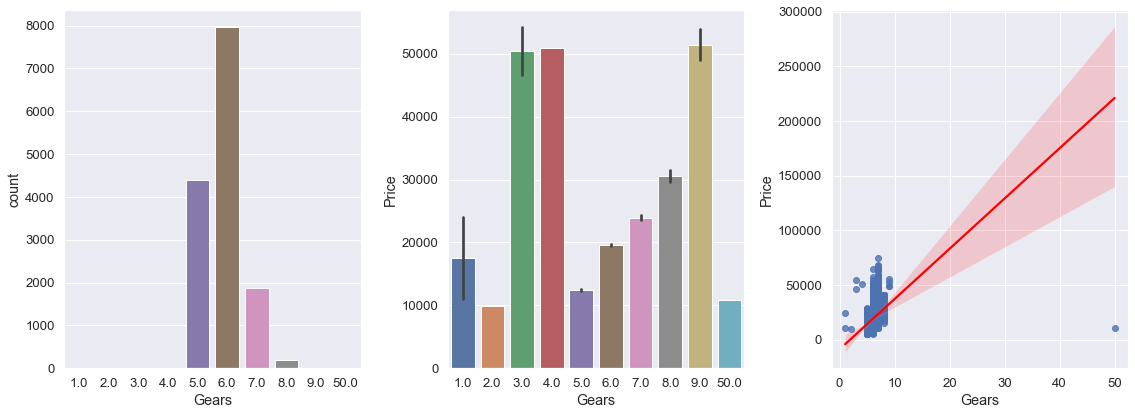

In [57]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Gears"],ax=ax[0]);
sns.barplot(x="Gears", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Gears", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [58]:
df[df["Gears"].isin([1,2,3,4,50])]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
8921,Opel Corsa,Compact,11000.0,VAT deductible,24000.0,2018-04-01,1.0,Used,Blue,Metallic,5.0,Semi-automatic,4.0,1163.0,front,Benzine,Euro 6d,"Air conditioning,Light sensor,Multi-function s...","Bluetooth,On-board computer,Radio,USB","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",1.0,4.800000,66.0,0,0,112.000000,Cloth,Black,1.4,1.0,"(10000, 15000]","(15000, 30000]","(1000, 1200]","(60, 70]","(100, 120]"
9812,Opel Corsa,Sedans,9880.0,VAT deductible,19247.0,2018-05-01,1.0,Used,Grey,Metallic,5.0,Manual,4.0,1164.0,front,Benzine,Euro 6,"Air conditioning,Light sensor,Navigation syste...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Fog l...",2.0,5.585566,51.0,0,0,126.450394,Cloth,Black,1.2,1.0,"(0, 10000]","(15000, 30000]","(1000, 1200]","(50, 60]","(120, 140]"
14375,Renault Clio,Compact,23990.0,No_Discount,10.0,2018-10-01,0.0,Demonstration,White,Metallic,5.0,Automatic,4.0,1288.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board computer","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",1.0,5.475474,147.0,0,0,135.642105,Unknown,Unknown,1.6,1.0,"(20000, 25000]","(-1, 5000]","(1200, 1400]","(120, 350]","(120, 140]"
14495,Renault Clio,Sedans,10798.0,VAT deductible,10.0,2019-01-01,0.0,Pre-registered,Black,Metallic,5.0,Manual,4.0,1165.0,front,Benzine,Euro 6,"Air conditioning,Cruise control,Electrical sid...",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",50.0,5.200000,56.0,0,0,118.000000,Cloth,Unknown,0.9,0.0,"(10000, 15000]","(-1, 5000]","(1000, 1200]","(50, 60]","(100, 120]"
15817,Renault Espace,Van,54204.0,VAT deductible,11.0,2019-05-01,0.0,New,White,Metallic,5.0,Automatic,4.0,1779.0,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,5.400000,146.0,0,0,144.116667,Part leather,Unknown,2.0,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(120, 350]","(140, 160]"
15822,Renault Espace,Van,50950.0,VAT deductible,11.0,2019-03-01,0.0,New,Grey,Metallic,5.0,Automatic,4.0,1647.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",4.0,7.600000,165.0,0,0,156.295337,Cloth,Unknown,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(120, 350]","(140, 160]"
15845,Renault Espace,Van,46660.0,VAT deductible,11.0,2019-09-01,0.0,New,White,Metallic,5.0,Automatic,4.0,1733.0,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",3.0,5.100000,118.0,0,0,122.086111,Part leather,Unknown,2.0,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(100, 120]","(120, 140]"


In [59]:
df[df["Gears"].isin([8,9])][["Model","Engine_Size","Gears","Fuel"]].value_counts()

Model           Engine_Size  Gears  Fuel   
Opel Insignia   2.0          8.0    Diesel     184
                1.6          8.0    Benzine      4
                2.0          8.0    Benzine      4
                1.6          8.0    Diesel       3
Renault Espace  1.8          9.0    Benzine      3
Audi A1         1.0          8.0    Benzine      2
Opel Corsa      1.4          8.0    Benzine      1
Opel Insignia   1.5          8.0    Benzine      1
Renault Espace  2.0          9.0    Diesel       1
dtype: int64

In [60]:
for indexes in df[df["Gears"].isin([1,2,3,4,50])].index:
    df.loc[indexes, "Gears"] = df[(df["Model"] == df["Model"][indexes]) & (df["Engine_Size"] == df["Engine_Size"][indexes])]["Gears"].mode()[0]

In [61]:
df[(df["Gears"] == 8) & ((df["Model"] == "Audi A1") | (df["Model"] == "Opel Corsa"))]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
215,Audi A1,Compact,16880.0,VAT deductible,6680.0,2017-12-01,1.0,Used,Blue,Metallic,4.0,Automatic,3.0,1184.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",8.0,4.4,70.0,0,1,104.0,Cloth,Other,1.0,2.0,"(15000, 20000]","(5000, 15000]","(1000, 1200]","(60, 70]","(100, 120]"
1033,Audi A1,Sedans,20500.0,No_Discount,3000.0,2018-12-01,1.0,Employee's car,Grey,Metallic,5.0,Automatic,4.0,1650.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Voice Control...","ABS,Adaptive Cruise Control,Alarm system,Centr...",8.0,4.9,60.0,0,0,129.0,Cloth,Black,1.0,1.0,"(20000, 25000]","(-1, 5000]","(1600, 1800]","(50, 60]","(120, 140]"
10151,Opel Corsa,Compact,14770.0,VAT deductible,5.0,2019-01-01,0.0,New,Grey,Metallic,5.0,Automatic,4.0,1178.0,front,Benzine,Euro 6d,"Air conditioning,Cruise control,Electrically h...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",8.0,5.9,66.0,0,0,136.0,Cloth,Black,1.4,0.0,"(10000, 15000]","(-1, 5000]","(1000, 1200]","(60, 70]","(120, 140]"


In [62]:
for indexes in df[(df["Gears"] == 8) & ((df["Model"] == "Audi A1") | (df["Model"] == "Opel Corsa"))].index:
    df.loc[indexes, "Gears"] = df[(df["Model"] == df["Model"][indexes]) & (df["Engine_Size"] == df["Engine_Size"][indexes])]["Gears"].mode()[0]

#### Consumption

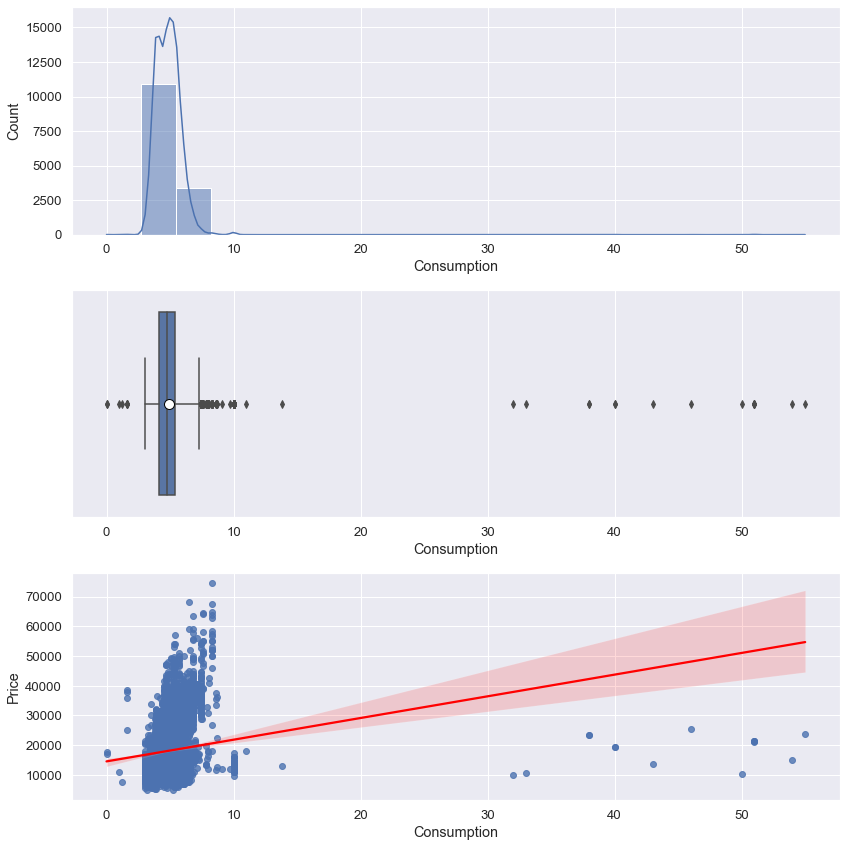

In [63]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Consumption"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Consumption",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Consumption", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [64]:
df["Consumption"].describe()

count    14433.000000
mean         4.892429
std          1.602418
min          0.000000
25%          4.100000
50%          4.800000
75%          5.400000
max         55.000000
Name: Consumption, dtype: float64

In [65]:
consumption_max_index = df[df["Consumption"] > 10].index
df[df["Consumption"] > 10]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Particulate_Filter,Inspection_Situation,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
500,Audi A1,Sedans,13719.0,VAT deductible,31255.000000,2016-03-01,1.0,Used,Silver,Metallic,5.0,Manual,3.0,1135.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,43.0,70.0,0,1,98.000000,Cloth,Grey,1.0,3.0,"(10000, 15000]","(30000, 60000]","(1000, 1200]","(60, 70]","(0, 100]"
535,Audi A1,Compact,12990.0,No_Discount,41200.000000,2016-02-01,1.0,Used,Silver,Metallic,5.0,Manual,3.0,1184.0,front,Benzine,Euro 4,"Air conditioning,Automatic climate control,Ele...","On-board computer,Bluetooth,Radio","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.0,13.8,70.0,0,1,331.000000,Cloth,Black,1.0,3.0,"(10000, 15000]","(30000, 60000]","(1000, 1200]","(60, 70]","(200, 1000]"
2194,Audi A1,Sedans,21390.0,VAT deductible,15.888889,2019-01-01,0.0,New,Blue,Metallic,5.0,Manual,3.0,1140.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.0,51.0,70.0,0,0,116.000000,Cloth,Black,1.0,0.0,"(20000, 25000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100, 120]"
2196,Audi A1,Sedans,21390.0,VAT deductible,1.000000,2019-01-01,0.0,New,Red,Metallic,5.0,Manual,3.0,1140.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.0,51.0,70.0,0,0,116.000000,Cloth,Black,1.0,0.0,"(20000, 25000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100, 120]"
2210,Audi A1,Sedans,21280.0,VAT deductible,1.000000,2019-01-01,0.0,New,Grey,Metallic,5.0,Manual,3.0,1140.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.0,51.0,70.0,0,0,116.000000,Cloth,Black,1.0,0.0,"(20000, 25000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100, 120]"
2237,Audi A1,Sedans,20980.0,VAT deductible,15.888889,2019-01-01,0.0,New,Black,Metallic,5.0,Manual,3.0,1140.0,front,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Central door lock with r...",5.0,51.0,70.0,0,0,116.000000,Cloth,Black,1.0,0.0,"(20000, 25000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100, 120]"
4089,Audi A3,Sedans,19500.0,VAT deductible,23644.000000,2018-02-01,1.0,Used,Blue,Metallic,5.0,Manual,4.0,1404.0,front,Diesel,Euro 6,"Cruise control,Electrical side mirrors,Parking...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Power steering,Traction ...",6.0,40.0,85.0,0,0,1.060000,Other,Other,1.6,1.0,"(15000, 20000]","(15000, 30000]","(1400, 1600]","(80, 90]","(0, 100]"
4102,Audi A3,Sedans,19500.0,VAT deductible,23644.000000,2018-02-01,1.0,Used,Blue,Metallic,5.0,Manual,4.0,1260.0,front,Diesel,Euro 6,"Air conditioning,Multi-function steering wheel...","Bluetooth,Radio","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,40.0,85.0,0,0,106.000000,Unknown,Unknown,1.6,1.0,"(15000, 20000]","(15000, 30000]","(1200, 1400]","(80, 90]","(100, 120]"
4556,Audi A3,Sedans,23500.0,VAT deductible,27815.000000,2018-03-01,1.0,Used,Grey,Metalli

In [66]:
df.loc[consumption_max_index,"Consumption"] = df.groupby(["Model","Engine_Size","Drive_Chain","Fuel"])["Consumption"].transform(lambda x : x.mean())[consumption_max_index].values
df.loc[consumption_max_index,"Consumption"]

500       4.700553
535       4.700553
2194      4.700553
2196      4.700553
2210      4.700553
2237      4.700553
4089      4.071029
4102      4.071029
4556      4.071029
4558      4.071029
10513    11.000000
11954     5.404040
13179     5.554946
14131     3.588722
14530     3.588722
14584     5.175142
15067     4.760058
Name: Consumption, dtype: float64

In [67]:
df[(df["Consumption"]>8) & (df["Consumption"]<10)][["Model","Engine_Size"]].value_counts()

Model           Engine_Size
Audi A3         2.5            20
Opel Insignia   2.0             8
Audi A3         1.5             1
Opel Insignia   3.0             1
Renault Duster  1.6             1
dtype: int64

In [68]:
consumption_min_index = df[df["Consumption"]<1.5]["Fuel"].index
df[df["Consumption"]<1.5]["Fuel"]

8217     Benzine
10566     Diesel
13678     Diesel
14902    Benzine
Name: Fuel, dtype: object

In [69]:
df.loc[consumption_min_index,"Consumption"] = df.groupby(["Model","Engine_Size","Fuel"])["Consumption"].transform(lambda x : x.mean())[consumption_min_index].values
df.loc[consumption_min_index,"Consumption"]

8217     5.490926
10566    5.461590
13678    3.477197
14902    9.643357
Name: Consumption, dtype: float64

In [70]:
df["Consumption"] = round(df["Consumption"],1)

#### Hp

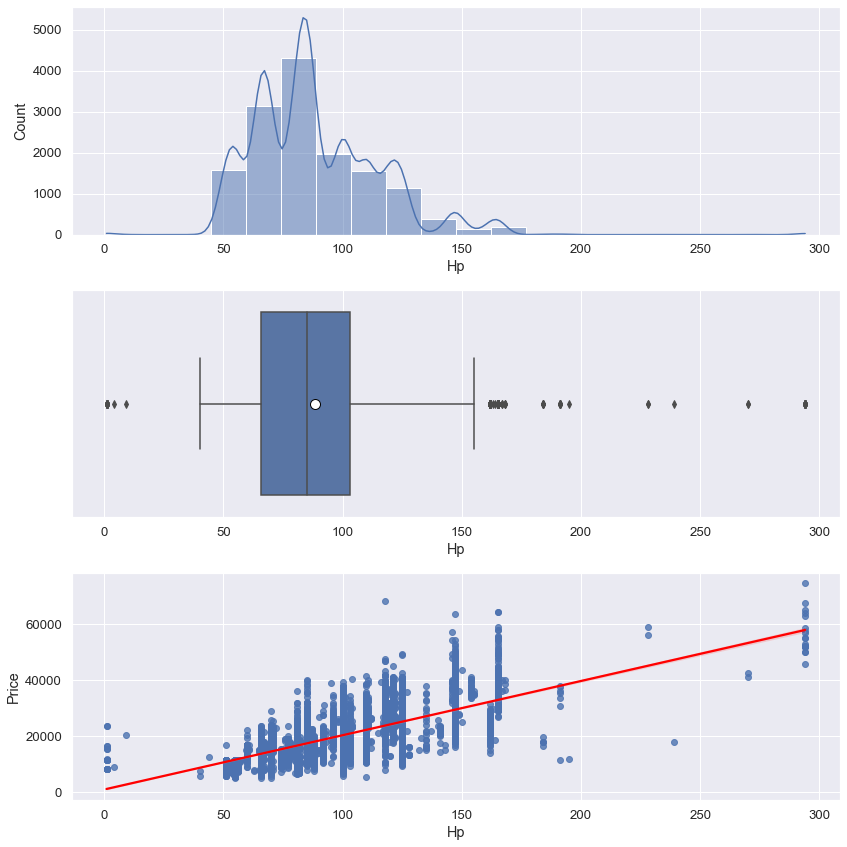

In [71]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Hp"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Hp",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Hp", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [72]:
df["Hp"].describe()

count    14433.000000
mean        88.502857
std         26.683781
min          1.000000
25%         66.000000
50%         85.000000
75%        103.000000
max        294.000000
Name: Hp, dtype: float64

In [73]:
df[df["Hp"]<60][["Model","Engine_Size","Fuel","Hp_Interval"]].value_counts()

Model           Engine_Size  Fuel     Hp_Interval
Opel Corsa      1.2          Benzine  (50, 60]       615
Renault Clio    1.5          Diesel   (50, 60]       256
                1.1          Benzine  (50, 60]       254
                0.9          Benzine  (50, 60]       244
Opel Corsa      1.4          Benzine  (50, 60]       103
                1.2          Diesel   (50, 60]        60
Renault Clio    1.0          Benzine  (50, 60]        15
Opel Corsa      1.3          Diesel   (50, 60]         8
Renault Clio    1.2          Benzine  (50, 60]         7
Opel Corsa      1.2          Benzine  (0, 50]          7
Renault Clio    1.5          Benzine  (50, 60]         6
Opel Astra      1.4          Benzine  (0, 50]          4
Opel Corsa      1.2          Gas      (50, 60]         4
Opel Insignia   1.6          Diesel   (0, 50]          4
Renault Clio    1.1          Gas      (50, 60]         3
Opel Corsa      1.4          Diesel   (50, 60]         2
Renault Espace  1.6          Diesel   

In [74]:
hp_min_index = df[df["Hp"]<50].index
df.loc[hp_min_index,"Hp"] = df.groupby(["Model","Engine_Size","Fuel"])["Hp"].transform(lambda x : x.mean())[hp_min_index].values
df.loc[hp_min_index,"Hp"]

3913      83.418886
6005      74.573892
6034      74.573892
6946      89.092933
7014     103.157603
7016     103.157603
7018     103.157603
7019     103.157603
8408      65.183678
8857      63.800000
9285      50.477492
9287      50.477492
9288      50.477492
9289      50.477492
9290      50.477492
9292      50.477492
9299      50.477492
10468     98.096956
10579     98.096956
10580     98.096956
10610     98.096956
13759     61.695642
13885     85.944181
15155    114.893875
15156    114.893875
Name: Hp, dtype: float64

In [75]:
df[df["Hp"]>150][["Model","Hp","Engine_Size","Fuel"]].value_counts()

Model           Hp     Engine_Size  Fuel   
Renault Espace  165.0  1.8          Benzine    171
Renault Clio    162.0  1.6          Benzine     79
Opel Insignia   154.0  2.0          Diesel      39
Audi A3         294.0  2.5          Benzine     18
Opel Insignia   191.0  2.0          Benzine      7
Renault Espace  165.0  1.6          Benzine      6
Opel Insignia   184.0  2.0          Benzine      5
                155.0  2.0          Diesel       4
Renault Espace  168.0  1.8          Benzine      3
Audi A3         270.0  2.5          Benzine      2
                228.0  2.0          Benzine      2
Renault Espace  167.0  1.8          Benzine      2
Audi A3         162.0  1.8          Benzine      1
Renault Clio    164.0  1.6          Benzine      1
                163.0  1.6          Benzine      1
Opel Insignia   239.0  2.8          Benzine      1
                195.0  2.0          Diesel       1
dtype: int64

In [76]:
df["Hp"] = round(df["Hp"])

In [77]:
df["Hp_Interval"] = pd.cut(df["Hp"],[50,60,70,80,90,100,120,150,200,350])
df["Hp_Interval"].value_counts()

(80, 90]      3964
(60, 70]      2870
(100, 120]    1836
(50, 60]      1740
(90, 100]     1711
(120, 150]    1488
(70, 80]       474
(150, 200]     320
(200, 350]      23
Name: Hp_Interval, dtype: int64

#### Particulate_Filter

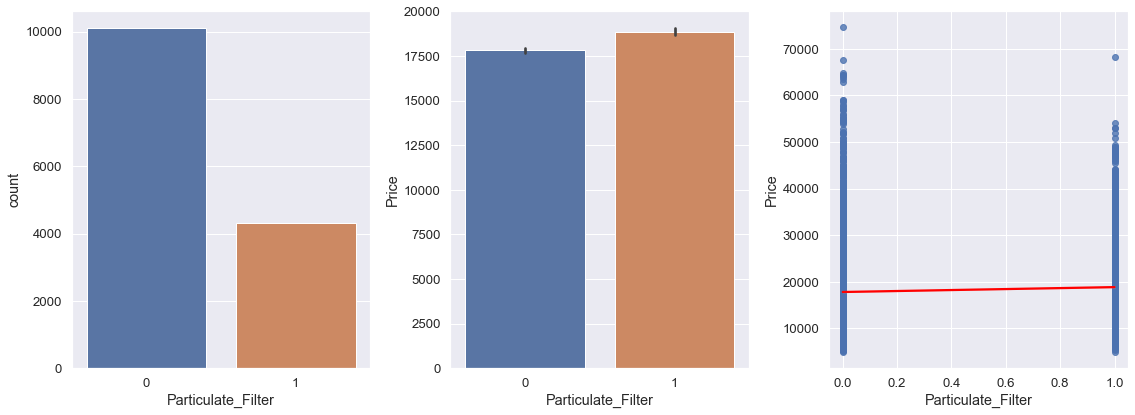

In [78]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Particulate_Filter"],ax=ax[0]);
sns.barplot(x="Particulate_Filter", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Particulate_Filter", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [79]:
df.corr()["Particulate_Filter"]

Price                   0.064733
Km                      0.256271
Prev_Owner              0.076675
Seat_Total              0.041119
Cylinders               0.150802
Weight                  0.288060
Gears                   0.210437
Consumption            -0.299986
Hp                      0.148790
Particulate_Filter      1.000000
Inspection_Situation    0.069555
Emission               -0.096679
Engine_Size             0.428204
Age                     0.175399
Name: Particulate_Filter, dtype: float64

In [80]:
#There is no effect on price column. So it is dropped
df.drop(columns="Particulate_Filter", inplace=True)

#### Inspection_Situation

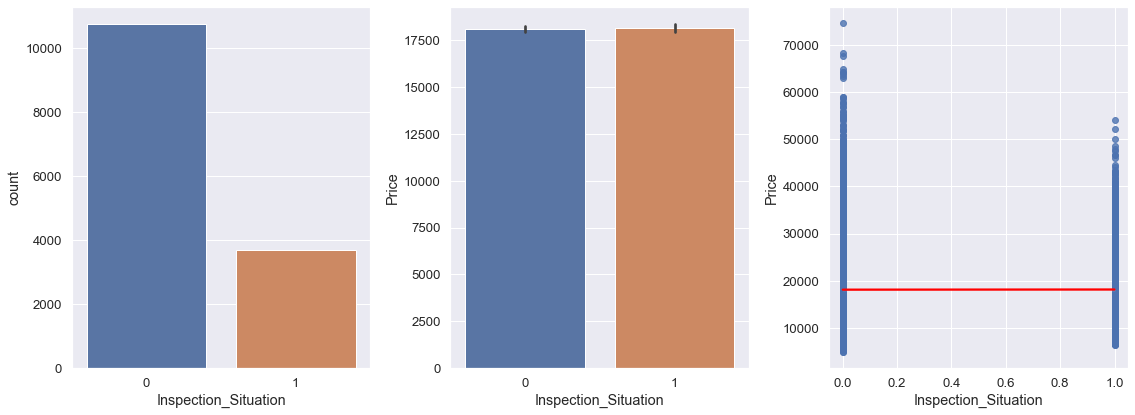

In [81]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Inspection_Situation"],ax=ax[0]);
sns.barplot(x="Inspection_Situation", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Inspection_Situation", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [82]:
df.corr()["Inspection_Situation"]

Price                   0.002165
Km                     -0.032023
Prev_Owner              0.067294
Seat_Total             -0.006721
Cylinders              -0.050434
Weight                 -0.022157
Gears                  -0.033306
Consumption             0.126386
Hp                      0.045720
Inspection_Situation    1.000000
Emission                0.118667
Engine_Size            -0.019691
Age                    -0.018094
Name: Inspection_Situation, dtype: float64

In [83]:
#There is no effect on price column. So it is dropped
df.drop(columns="Inspection_Situation", inplace=True)

#### Emission

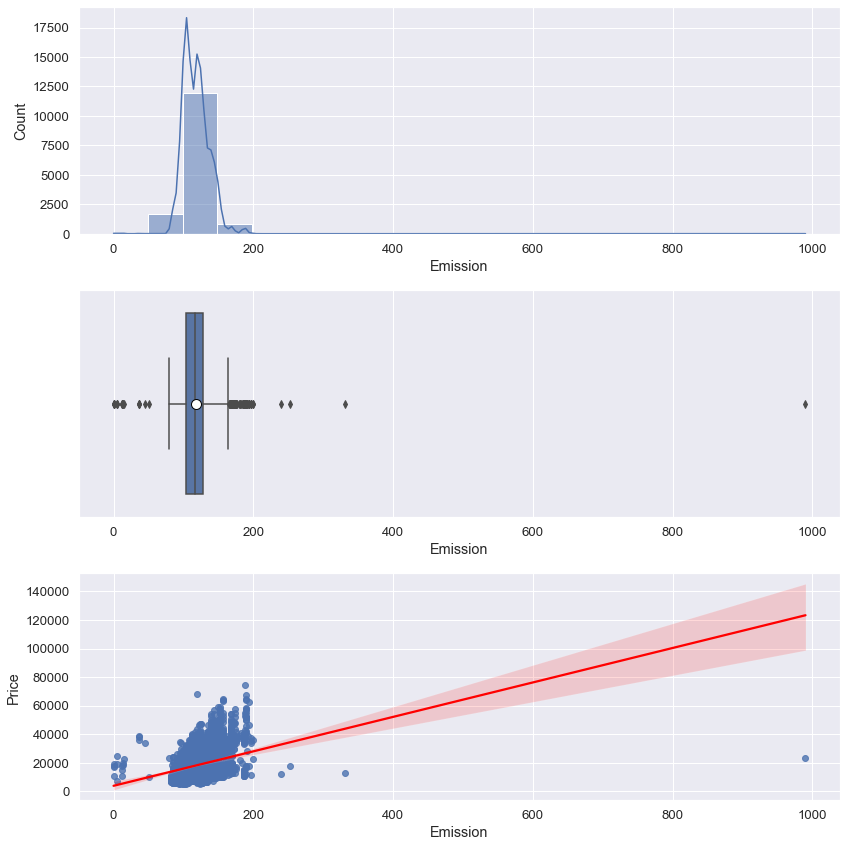

In [84]:
fig, ax = plt.subplots(3,1, figsize = (12,12))
sns.histplot(df["Emission"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            x="Emission",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Emission", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

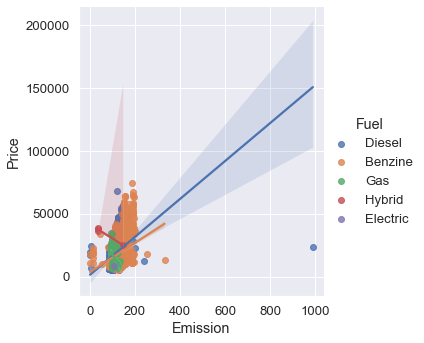

In [85]:
sns.lmplot(data=df,x="Emission",y="Price",hue="Fuel")

In [86]:
col = "Emission"
lower_limit = np.percentile(df[col], 25) - 1.5*stats.iqr(df[col])
upper_limit = np.percentile(df[col], 75) + 1.5*stats.iqr(df[col])
lower_limit,upper_limit

(68.0, 164.0)

In [87]:
df[df["Emission"] > upper_limit][["Model","Fuel","Engine_Size"]].value_counts()

Model           Fuel     Engine_Size
Opel Insignia   Diesel   2.0            59
Renault Espace  Benzine  1.8            59
Renault Duster  Benzine  1.6            24
Audi A3         Benzine  2.5            20
Opel Insignia   Benzine  1.6            18
                         2.0            10
Renault Espace  Diesel   2.0             9
Opel Astra      Benzine  1.6             5
                         1.4             4
Opel Corsa      Benzine  1.4             3
Audi A1         Benzine  1.0             1
Audi A3         Benzine  2.0             1
                Diesel   1.6             1
Opel Insignia   Benzine  2.8             1
                Diesel   3.0             1
dtype: int64

In [88]:
df[(df["Emission"] > upper_limit) & (df["Engine_Size"] < 1.6)]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
535,Audi A1,Compact,12990.0,No_Discount,41200.0,2016-02-01,1.0,Used,Silver,Metallic,5.0,Manual,3.0,1184.0,front,Benzine,Euro 4,"Air conditioning,Automatic climate control,Ele...","On-board computer,Bluetooth,Radio","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.0,4.7,70.0,331.0,Cloth,Black,1.0,3.0,"(10000, 15000]","(30000, 60000]","(1000, 1200]","(60, 70]","(200, 1000]"
7735,Opel Astra,Station wagon,25550.0,VAT deductible,100.0,2019-01-01,1.0,Used,White,Metallic,5.0,Automatic,4.0,1321.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Sport seats,Touch scree...","ABS,Adaptive headlights,Blind spot monitor,Cen...",6.0,6.0,110.0,170.0,Full leather,Black,1.4,0.0,"(25000, 30000]","(-1, 5000]","(1200, 1400]","(100, 120]","(160, 200]"
7741,Opel Astra,Station wagon,25550.0,VAT deductible,100.0,2019-01-01,1.0,Used,Black,Metallic,5.0,Automatic,4.0,1321.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Roof rack,Sport seats,Touch scree...","ABS,Adaptive headlights,Blind spot monitor,Cen...",6.0,6.0,110.0,170.0,Full leather,Black,1.4,0.0,"(25000, 30000]","(-1, 5000]","(1200, 1400]","(100, 120]","(160, 200]"
7773,Opel Astra,Sedans,24750.0,VAT deductible,100.0,2019-02-01,1.0,Used,White,Metallic,5.0,Automatic,4.0,1321.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Sport seats,Touch screen,Voice Co...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,6.1,110.0,170.0,Full leather,Black,1.4,0.0,"(20000, 25000]","(-1, 5000]","(1200, 1400]","(100, 120]","(160, 200]"
7777,Opel Astra,Sedans,24750.0,VAT deductible,100.0,2019-02-01,1.0,Used,Black,Metallic,5.0,Automatic,4.0,1321.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Sport seats,Touch screen,Voice Co...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,6.1,110.0,170.0,Full leather,Black,1.4,0.0,"(20000, 25000]","(-1, 5000]","(1200, 1400]","(100, 120]","(160, 200]"
8830,Opel Corsa,Other,13890.0,VAT deductible,10.0,2018-11-01,0.0,Pre-registered,Black,Metallic,5.0,Automatic,4.0,1178.0,front,Benzine,Euro 6d,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,6.6,66.0,165.0,Cloth,Black,1.4,1.0,"(10000, 15000]","(-1, 5000]","(1000, 1200]","(60, 70]","(160, 200]"
8842,Opel Corsa,Compact,13890.0,VAT deductible,5977.0,2019-02-01,1.0,Used,Silver,Metallic,5.0,Automatic,4.0,1178.0,front,Benzine,Euro 6d,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Central door lock,Daytime running lights,D...",5.0,6.6,66.0,167.0,Cloth,Black,1.4,0.0,"(10000, 15000]","(5000, 15000]","(1000, 1200]","(60, 70]","(160, 200]"
9683,Opel Corsa,Compact,14480.0,VAT deductible,10.0,2018-09-01,0.0,Pre-registered,Silver,Metallic,5.0,Automatic,4.0,1178.0,front,Benzine,Euro 6,"Air conditioning,Cruise control,Electrically h...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,6.9,66.0,170.0,Cloth,Black,1.4,1.0,"(10000, 15000]","(-1, 5000]","(1000, 1200]","(60, 70]","(160, 200]"


In [89]:
emission_max_index = df[(df["Emission"] > upper_limit) & (df["Engine_Size"] < 1.6)].index
df.loc[emission_max_index,"Emission"] = df.groupby(["Model","Emission_Class","Engine_Size","Fuel"])["Emission"].transform(lambda x : x.mean())[emission_max_index].values
df.loc[emission_max_index,"Emission"]

535     331.000000
7735    131.447671
7741    131.447671
7773    131.447671
7777    131.447671
8830    141.115130
8842    141.115130
9683    125.904808
Name: Emission, dtype: float64

In [90]:
df[(df["Emission"] >200) & (df["Drive_Chain"] != "4WD")]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
535,Audi A1,Compact,12990.0,No_Discount,41200.0,2016-02-01,1.0,Used,Silver,Metallic,5.0,Manual,3.0,1184.0,front,Benzine,Euro 4,"Air conditioning,Automatic climate control,Ele...","On-board computer,Bluetooth,Radio","Ski bag,Sport suspension","ABS,Alarm system,Central door lock,Driver-side...",5.0,4.7,70.0,331.0,Cloth,Black,1.0,3.0,"(10000, 15000]","(30000, 60000]","(1000, 1200]","(60, 70]","(200, 1000]"
4556,Audi A3,Sedans,23500.0,VAT deductible,27815.0,2018-03-01,1.0,Used,Grey,Metallic,5.0,Automatic,4.0,1404.0,front,Diesel,Euro 6,"Multi-function steering wheel,Park Distance Co...",Bluetooth,Alloy wheels,"ABS,Central door lock,Power steering,Traction ...",6.0,4.1,81.0,990.0,Other,Other,1.6,1.0,"(20000, 25000]","(15000, 30000]","(1400, 1600]","(80, 90]","(200, 1000]"
10771,Opel Insignia,Station wagon,12000.0,Price negotiable,185000.0,2016-02-01,1.0,Used,White,Metallic,5.0,Automatic,6.0,2295.0,front,Diesel,Euro 4,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Catalytic Converter,Roof rack,Ski...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.0,9.1,100.0,239.0,Unknown,Unknown,3.0,3.0,"(10000, 15000]","(100000, 350000]","(1800, 3000]","(90, 100]","(200, 1000]"


In [91]:
emission_max_index = df[(df["Emission"] >200) & (df["Drive_Chain"] != "4WD")].index
df.loc[emission_max_index,"Emission"] = df.groupby(["Model","Emission_Class","Engine_Size","Fuel"])["Emission"].transform(lambda x : x.mean())[emission_max_index].values
df.loc[emission_max_index,"Emission"]

535      331.000000
4556     104.680708
10771    239.000000
Name: Emission, dtype: float64

In [92]:
df[df["Emission"]<lower_limit][["Model","Fuel","Engine_Size"]].value_counts()

Model           Fuel     Engine_Size
Audi A3         Hybrid   1.4            3
Opel Astra      Benzine  1.4            3
Opel Corsa      Benzine  1.4            2
Opel Insignia   Benzine  1.5            2
                Diesel   2.0            2
Audi A3         Diesel   1.6            1
Opel Astra      Benzine  1.0            1
                Diesel   1.6            1
Opel Insignia   Benzine  1.6            1
                Diesel   1.6            1
Renault Duster  Benzine  1.6            1
dtype: int64

In [93]:
emission_min_index = df[(df["Emission"]<lower_limit) & (df["Fuel"] != "Hybrid")].index
df.loc[emission_min_index,"Emission"] = df.groupby(["Model","Emission_Class","Fuel","Engine_Size"])["Emission"].transform(lambda x : x.mean())[emission_min_index].values
df.loc[emission_min_index,"Emission"]

4089     104.116091
5818     125.275529
6397     104.465717
6578     125.275529
8110     109.493506
8217     130.788657
8542     125.854528
9798     125.854528
10566    143.037553
11553    143.037553
11888    136.958026
12343    136.958026
12547    147.844665
13008    127.176744
14902    176.111375
Name: Emission, dtype: float64

In [94]:
df[df["Fuel"] == "Hybrid"]["Emission"]

3356    145.900096
3612     36.000000
3615     36.000000
3617     36.000000
Name: Emission, dtype: float64

In [95]:
df.loc[df["Fuel"] == "Hybrid", "Emission"] = df[df["Fuel"] == "Hybrid"]["Emission"].mode()[0]

In [96]:
df["Emission"] = round(df["Emission"],1)

In [97]:
df["Emission_Interval"] = pd.cut(df["Emission"],[-0.1,100,120,140,160,400])
df["Emission_Interval"].value_counts(dropna=False)

(100.0, 120.0]    6459
(120.0, 140.0]    4035
(-0.1, 100.0]     2246
(140.0, 160.0]    1459
(160.0, 400.0]     234
Name: Emission_Interval, dtype: int64

#### Engine_Size

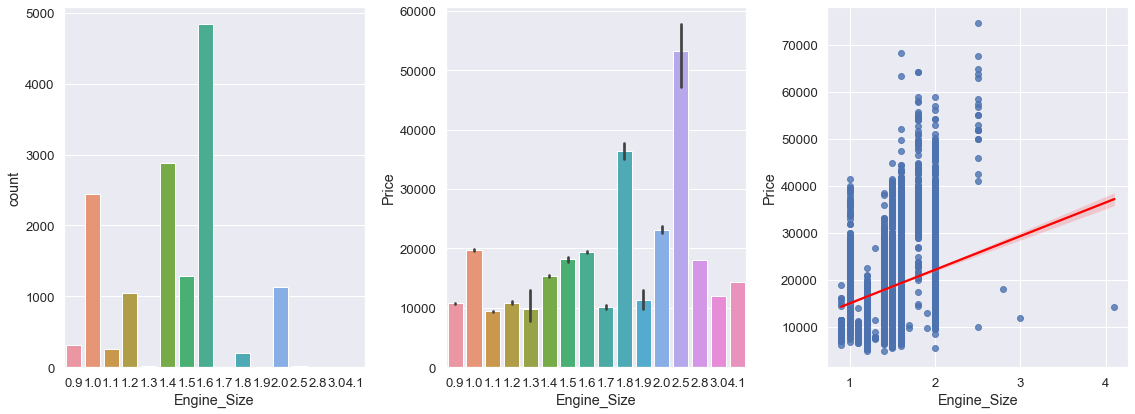

In [98]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Engine_Size"],ax=ax[0]);
sns.barplot(x="Engine_Size", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Engine_Size", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [99]:
df[df["Engine_Size"] > 2].groupby(["Model","Hp_Interval"])["Engine_Size"].value_counts()

Model          Hp_Interval  Engine_Size
Audi A3        (200, 350]   2.5            20
Opel Insignia  (90, 100]    3.0             1
               (200, 350]   2.8             1
Renault Clio   (50, 60]     2.5             1
               (60, 70]     4.1             1
Name: Engine_Size, dtype: int64

In [100]:
for indexes in df[(df["Engine_Size"] > 2) & (df["Model"] == "Renault Clio")].index:
    df.loc[indexes, "Engine_Size"] = df[(df["Model"] == df["Model"][indexes]) & (df["Hp_Interval"] == df["Hp_Interval"][indexes])]["Engine_Size"].mode()[0]

In [101]:
df[df["Engine_Size"] <1.2].groupby(["Model","Hp_Interval"])["Engine_Size"].value_counts()

Model           Hp_Interval  Engine_Size
Audi A1         (50, 60]     1.0            152
                             0.9              4
                (60, 70]     1.0            752
                             0.9              1
                (70, 80]     1.0             55
                (80, 90]     1.0            509
                (90, 100]    1.0              2
Audi A3         (80, 90]     1.0            514
                (90, 100]    1.0              1
                (100, 120]   1.0              3
Opel Astra      (60, 70]     1.0             77
                (70, 80]     1.0            330
                (80, 90]     1.0              1
Opel Corsa      (50, 60]     1.0              1
                (60, 70]     1.0              8
                (80, 90]     1.0              1
Opel Insignia   (90, 100]    1.0             14
                (120, 150]   1.0              9
Renault Clio    (50, 60]     1.1            257
                             0.9            244

In [102]:
df[(df["Model"] == "Opel Insignia") & (df["Engine_Size"] == 1.0)]

,Model,Body_Type,Price,Vat,Km,Registration_Date,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
12467,Opel Insignia,Station wagon,37490.0,VAT deductible,4056.359477,2019-06-01,1.0,Demonstration,Grey,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,Radio","Alloy wheels,Roof rack","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.0,100.0,122.8,Part leather,Unknown,1.0,0.0,"(30000, 80000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12473,Opel Insignia,Station wagon,34490.0,VAT deductible,4056.359477,2019-05-01,1.0,Demonstration,Silver,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...",Bluetooth,"Alloy wheels,Roof rack,Sport package,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.0,100.0,122.8,Part leather,Unknown,1.0,0.0,"(30000, 80000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12484,Opel Insignia,Sedans,33990.0,VAT deductible,10.000000,2019-05-01,1.0,Demonstration,Black,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.0,100.0,122.8,Part leather,Black,1.0,0.0,"(30000, 80000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12499,Opel Insignia,Station wagon,36990.0,VAT deductible,4056.359477,2019-04-01,1.0,Demonstration,Red,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.0,100.0,122.8,Part leather,Black,1.0,0.0,"(30000, 80000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12501,Opel Insignia,Station wagon,36990.0,VAT deductible,70.000000,2019-05-01,1.0,Demonstration,White,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6d,"Air conditioning,Automatic climate control,Cru...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.0,100.0,122.8,Part leather,Black,1.0,0.0,"(30000, 80000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12554,Opel Insignia,Station wagon,33590.0,VAT deductible,1574.000000,2019-02-01,1.0,Demonstration,Silver,Metallic,5.0,Automatic,4.0,1241.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Voice Control","ABS,Blind spot monitor,Central door lock,Drive...",6.0,6.1,121.0,143.2,Part leather,Unknown,1.0,0.0,"(30000, 80000]","(-1, 5000]","(1200, 1400]","(120, 150]","(140.0, 160.0]"
12604,Opel Insignia,Station wagon,28990.0,VAT deductible,2254.000000,2019-03-01,1.0,Demonstration,Grey,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6,"Cruise control,Electrical side mirrors,Multi-f...","Bluetooth,On-board computer","Alloy wheels,Sport seats","ABS,Central door lock,Driver-side airbag,Elect...",6.0,5.0,100.0,122.8,Cloth,Unknown,1.0,0.0,"(25000, 30000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12670,Opel Insignia,Station wagon,29990.0,VAT deductible,4056.359477,2019-06-01,1.0,Demonstration,Grey,Metallic,5.0,Automatic,4.0,1241.0,front,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,On-board computer","Alloy wheels,Roof rack","ABS,Central door lock,Daytime running lights,D...",6.0,5.0,100.0,122.8,Cloth,Unknown,1.0,0.0,"(25000, 30000]","(-1, 5000]","(1200, 1400]","(90, 100]","(120.0, 140.0]"
12750,Opel Insignia,Sedans,41490.0,VAT deductible,10.000000,2019-01-01,0.0,New,Black,Metallic,5.0,Manual,4

In [103]:
df.loc[((df["Model"]=="Renault Espace") & (df["Engine_Size"]==1.0)), "Engine_Size"] = df[df["Model"] == "Renault Espace"]["Engine_Size"].mode()[0]

#### Age 

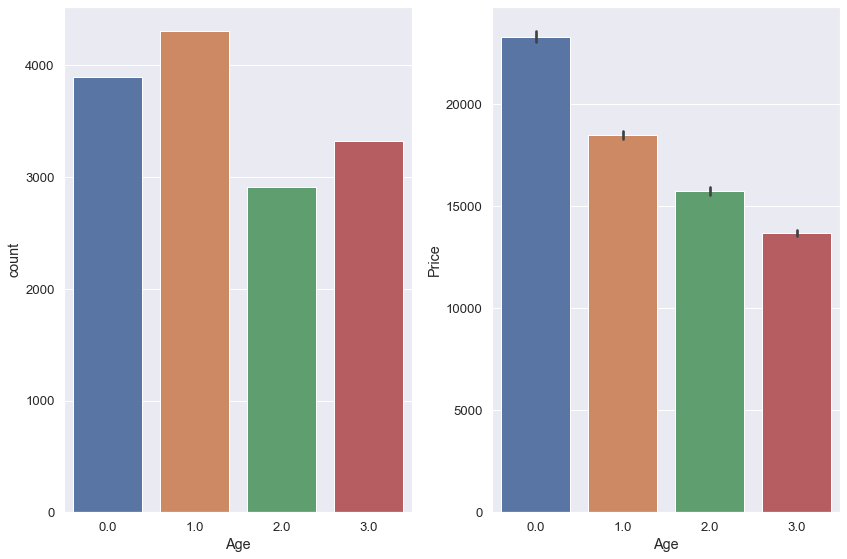

In [104]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Age"],ax=ax[0]);
sns.barplot(x="Age", y="Price", data=df, ax=ax[1]);
plt.tight_layout()

In [105]:
df.drop(columns="Registration_Date", inplace=True)

### Categorical Features

In [106]:
df.select_dtypes(include="O").describe().T

,count,unique,top,freq
Model,14433,9,Audi A3,2813
Body_Type,14433,9,Sedans,7233
Vat,14433,3,VAT deductible,10000
Type,14433,5,Used,10200
Body_Color,14433,16,Black,3642
Paint_Type,14433,3,Metallic,14085
Gear_Type,14433,3,Manual,7333
Drive_Chain,14433,3,front,14229
Fuel,14433,5,Benzine,7746
Emission_Class,14433,5,Euro 6,12026


#### Model

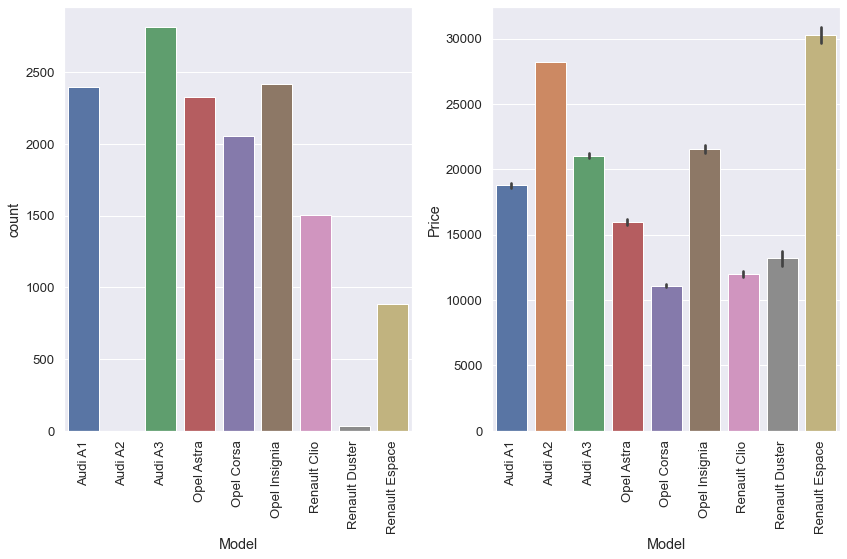

In [107]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Model"],ax=ax[0]).set_xticklabels(sns.countplot(df["Model"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Model", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Model"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

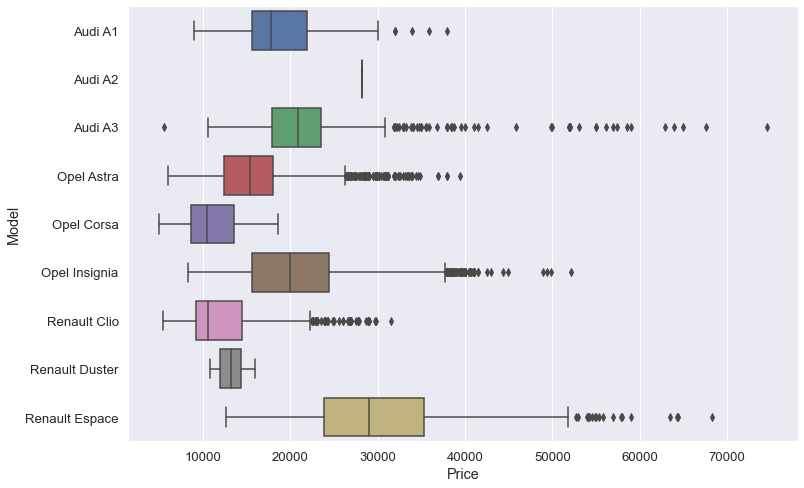

In [108]:
sns.boxplot(y="Model", x="Price", data=df);

In [109]:
df.groupby("Model").describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
Audi A1,2397.0,18775.398415,4467.166046,8999.0,15590.00,17750.0,21880.00,37900.0
Audi A2,1.0,28200.000000,NaN,28200.0,28200.00,28200.0,28200.00,28200.0
Audi A3,2813.0,21037.946676,5086.706311,5555.0,17900.00,20900.0,23490.00,74600.0
Opel Astra,2327.0,15967.612806,5021.168978,6000.0,12455.00,15390.0,18000.00,39433.0
Opel Corsa,2055.0,11107.847281,2994.303439,4950.0,8700.00,10500.0,13590.00,18622.0
Opel Insignia,2414.0,21570.608119,7795.535719,8290.0,15622.25,19990.0,24477.50,52120.0
Renault Clio,1506.0,11985.969456,4260.031407,5445.0,9250.00,10590.0,14498.75,31500.0
Renault Duster,34.0,13230.176471,1622.404678,10850.0,11925.00,13189.0,14399.00,16033.0
Renault Espace,886.0,30290.372460,8804.495854,12614.0,23912.50,28990.0,35261.50,68320.0


#### Body_Type

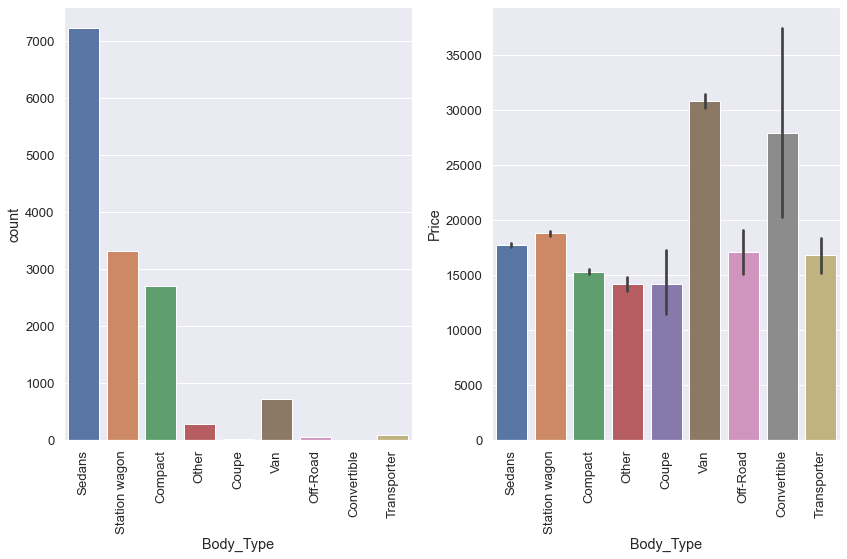

In [110]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Body_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Body_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Body_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Body_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

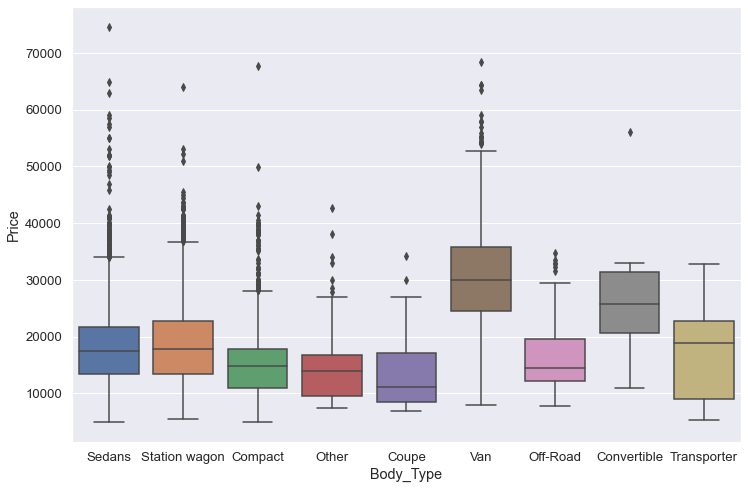

In [111]:
sns.boxplot(x="Body_Type", y="Price", data=df);

In [112]:
df.groupby(["Model","Body_Type"]).describe()["Price"]

count          mean           std      min  \
Model          Body_Type                                                    
Audi A1        Compact         901.0  19041.815760   4527.250853   9950.0   
               Coupe             2.0  14925.000000   1378.858223  13950.0   
               Other            12.0  21987.500000   3562.450957  16590.0   
               Sedans         1460.0  18596.722603   4416.405604   8999.0   
               Station wagon    21.0  17811.380952   4360.610089  12950.0   
               Van               1.0  29000.000000           NaN  29000.0   
Audi A2        Off-Road          1.0  28200.000000           NaN  28200.0   
Audi A3        Compact         148.0  20231.108108   7006.529582  12900.0   
               Convertible       8.0  27905.375000  13457.660155  10893.0   
               Coupe             4.0  17745.000000    962.652585  16990.0   
               Other            16.0  20388.125000   4545.676655  12550.0   
               Sedans         2358.0  21120.249364   4928.422672  10550.0   
               Station wagon   279.0  20657.917563   4696.683514   5555.0   
Opel Astra     Compact         129.0  17000.069767   6775.234361   8450.0   
               Coupe             2.0  22240.000000  10960.155108  14490.0   
               Off-Road          1.0  18590.000000           NaN  18590.0   
               Other            67.0  13864.313433   2433.767239   8490.0   
               Sedans          973.0  16071.886948   4429.896384   6500.0   
               Station wagon  1155.0  15873.334199   5318.443502   6000.0   
Opel Corsa     Compact        1114.0  11877.514476   3113.741708   4990.0   
               Coupe            13.0   8772.307692   1578.993107   6900.0   
               Off-Road          3.0   8166.666667    461.880215   7900.0   
               Other            87.0   9888.327586   1819.188159   7900.0   
               Sedans          830.0  10282.892212   2629.963743   4950.0   
               Transporter       7.0   7650.000000   2271.930163   5250.0   
               Van               1.0   7900.000000           NaN   7900.0   
Opel Insignia  Compact          26.0  29291.615385  10894.453925  10350.0   
               Coupe             1.0  17094.000000           NaN  17094.0   
               Off-Road          7.0  29451.285714   7618.618241  12750.0   
               Other            48.0  18247.791667   5283.707277  10600.0   
               Sedans          796.0  21619.665829   7500.524022   8600.0   
               Station wagon  1535.0  21485.657980   7858.687289   8290.0   
               Van               1.0  20980.000000           NaN  20980.0   
Renault Clio   Compact         375.0  13007.469333   4368.692274   5800.0   
               Coupe             1.0  17990.000000           NaN  17990.0   
               Off-Road          2.0  12845.000000   7276.128778   7700.0   
               Other            47.0  12234.191489   3103.588706   7500.0   
               Sedans          796.0  11813.736181   4503.482075   5445.0   
               Station wagon   254.0  11361.791339   3193.783724   5900.0   
               Transporter      28.0   8462.607143   1349.016276   5900.0   
               Van               3.0   9266.666667    709.459888   8500.0   
Renault Duster Off-Road         34.0  13230.176471   1622.404678  10850.0   
Renault Espace Compact           6.0  30046.666667  10287.634649  17900.0   
               Coupe             2.0  30567.000000   5052.985058  26994.0   
               Off-Road          8.0  25762.500000   5385.347183  14900.0   
               Other             7.0  28981.571429   8369.662316  17500.0   
               Sedans           20.0  30010.050000   7755.312390  18999.0   
               Station wagon    66.0  29929.378788   8919.567759  16900.0   
               Transporter      52.0  22606.480769   4226.833096  14999.0   
               Van             725.0  30945.942069   8844.318883  12614.0   

                          

In [113]:
df[df["Body_Type"].isin(["Van","Transporter"])][["Model","Body_Type"]].value_counts()

Model           Body_Type  
Renault Espace  Van            725
                Transporter     52
Renault Clio    Transporter     28
Opel Corsa      Transporter      7
Renault Clio    Van              3
Audi A1         Van              1
Opel Corsa      Van              1
Opel Insignia   Van              1
dtype: int64

In [114]:
df[(df["Model"] == "Renault Clio") & (df["Body_Type"] == "Transporter")].sample(5)

,Model,Body_Type,Price,Vat,Km,Prev_Owner,Type,Body_Color,Paint_Type,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
13929,Renault Clio,Transporter,9290.0,No_Discount,14936.0,1.0,Used,White,Metallic,2.0,Manual,4.0,1170.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,3.6,56.0,89.1,Unknown,Unknown,1.5,2.0,"(0, 10000]","(5000, 15000]","(1000, 1200]","(50, 60]","(-0.1, 100.0]"
13863,Renault Clio,Transporter,8590.0,No_Discount,24238.0,1.0,Used,White,Metallic,2.0,Manual,4.0,1170.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,3.6,56.0,89.1,Unknown,Unknown,1.5,2.0,"(0, 10000]","(15000, 30000]","(1000, 1200]","(50, 60]","(-0.1, 100.0]"
13525,Renault Clio,Transporter,8190.0,No_Discount,44023.0,1.0,Used,White,Metallic,2.0,Manual,4.0,1170.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,On-board computer",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",5.0,3.6,56.0,89.1,Unknown,Unknown,1.5,3.0,"(0, 10000]","(30000, 60000]","(1000, 1200]","(50, 60]","(-0.1, 100.0]"
13423,Renault Clio,Transporter,6490.0,No_Discount,112000.0,1.0,Used,White,Metallic,2.0,Manual,4.0,1087.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,On-board computer,Radio,USB",Touch screen,"ABS,Central door lock with remote control,Driv...",5.0,3.3,55.0,85.0,Cloth,Grey,1.5,3.0,"(0, 10000]","(100000, 350000]","(1000, 1200]","(50, 60]","(-0.1, 100.0]"
13666,Renault Clio,Transporter,7800.0,No_Discount,32756.0,1.0,Used,White,Metallic,2.0,Manual,4.0,1214.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","Bluetooth,Hands-free equipment,On-board comput...","Touch screen,Voice Control","ABS,Alarm system,Central door lock,Central doo...",5.0,3.3,55.0,85.0,Cloth,Black,1.5,2.0,"(0, 10000]","(30000, 60000]","(1200, 1400]","(50, 60]","(-0.1, 100.0]"


In [115]:
df[(df["Model"] == "Renault Clio")]["Body_Type"].value_counts()

Sedans           796
Compact          375
Station wagon    254
Other             47
Transporter       28
Van                3
Off-Road           2
Coupe              1
Name: Body_Type, dtype: int64

In [116]:
for indexes in df[df["Body_Type"].isin(["Van","Transporter"]) & (df["Model"] != "Renault Espace")].index:
    df.loc[indexes, "Body_Type"] = df[df["Model"] == df["Model"][indexes]]["Body_Type"].mode()[0]

#### Vat

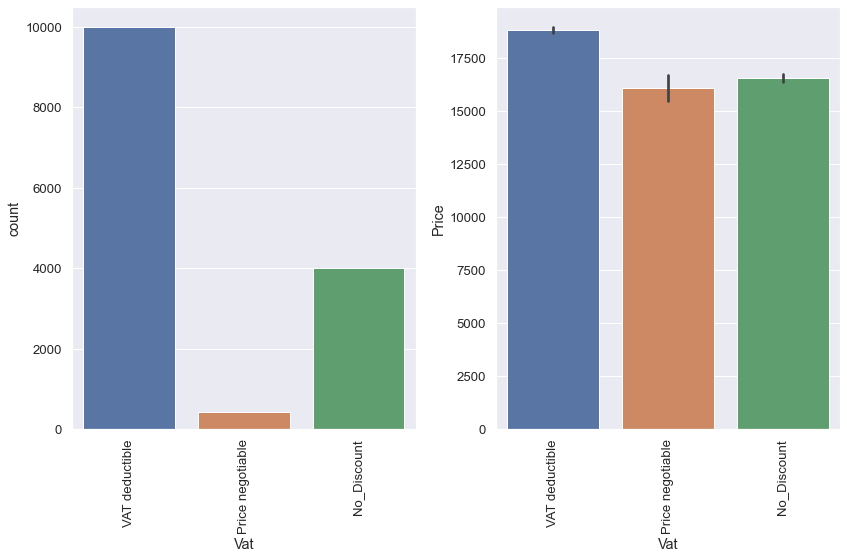

In [117]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Vat"],ax=ax[0]).set_xticklabels(sns.countplot(df["Vat"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Vat", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Vat"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

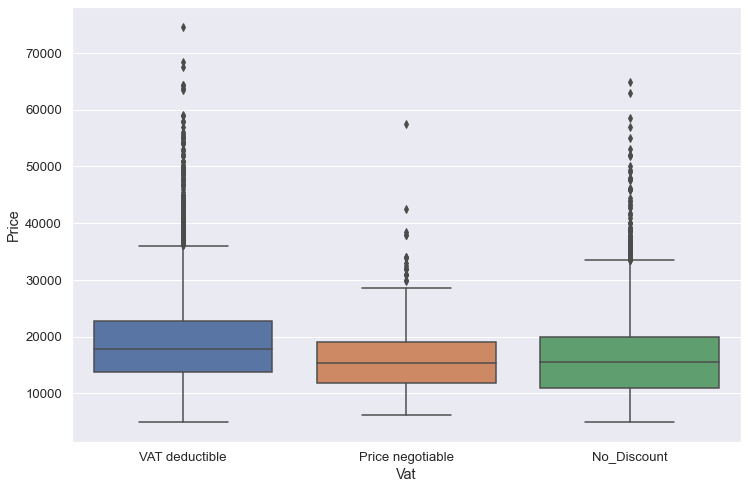

In [118]:
sns.boxplot(x="Vat", y="Price", data=df);

In [119]:
df.groupby(["Vat"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Vat,,,,,,,,
No_Discount,4008.0,16565.642256,7033.511002,4950.0,10995.0,15500.0,19990.0,64900.0
Price negotiable,425.0,16093.851765,6352.339403,6250.0,11900.0,15400.0,18990.0,57400.0
VAT deductible,10000.0,18837.026800,7501.907606,4990.0,13800.0,17900.0,22720.0,74600.0


#### Type

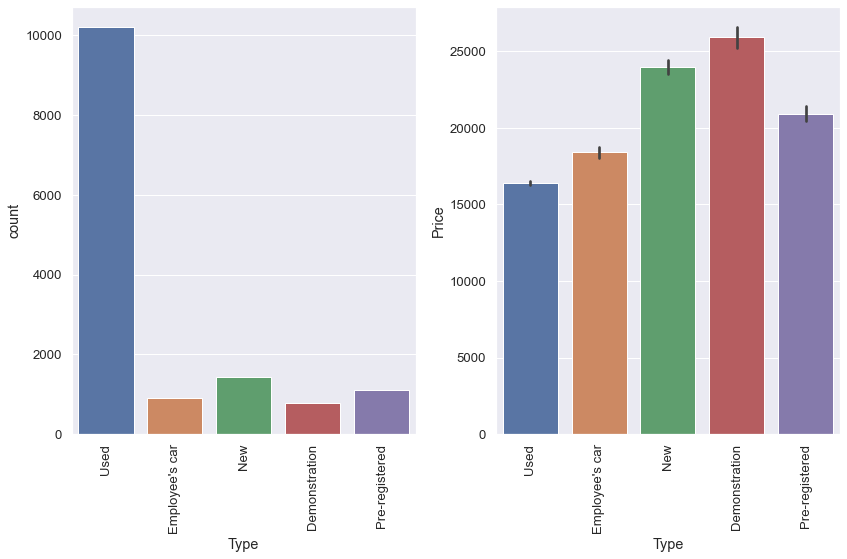

In [120]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

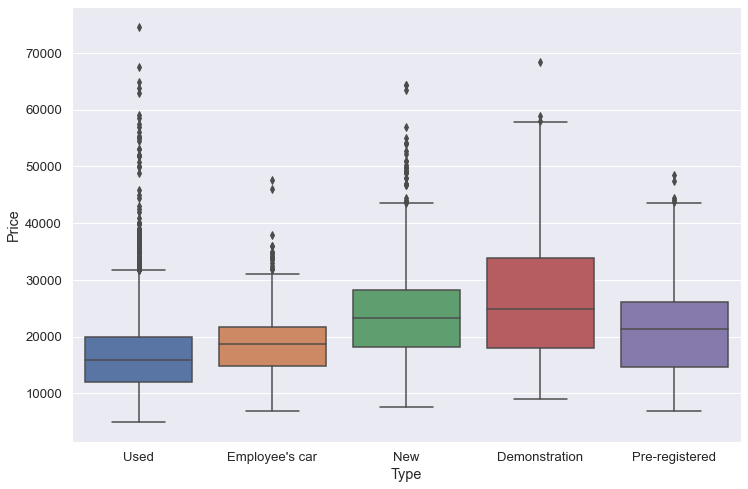

In [121]:
sns.boxplot(x="Type", y="Price", data=df);

In [122]:
df.groupby(["Type"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Demonstration,781.0,25905.706786,10045.262936,8990.0,17990.0,24930.0,33940.00,68320.0
Employee's car,907.0,18388.796031,5532.528099,6950.0,14900.0,18750.0,21695.00,47590.0
New,1426.0,23961.857381,8635.893094,7650.0,18166.0,23289.5,28308.75,64332.0
Pre-registered,1119.0,20901.434316,8133.743027,6950.0,14585.0,21410.0,26150.00,48490.0
Used,10200.0,16385.876523,6043.883001,4950.0,12000.0,15900.0,19900.00,74600.0


In [123]:
df[df["Type"] == "New"]["Age"].value_counts()

0.0    1423
1.0       3
Name: Age, dtype: int64

In [124]:
df.loc[((df["Type"] == "New") & (df["Age"] == 1)),"Age"] = 0

#### Body_Color

In [125]:
df["Body_Color"] = df["Body_Color"].str.strip()

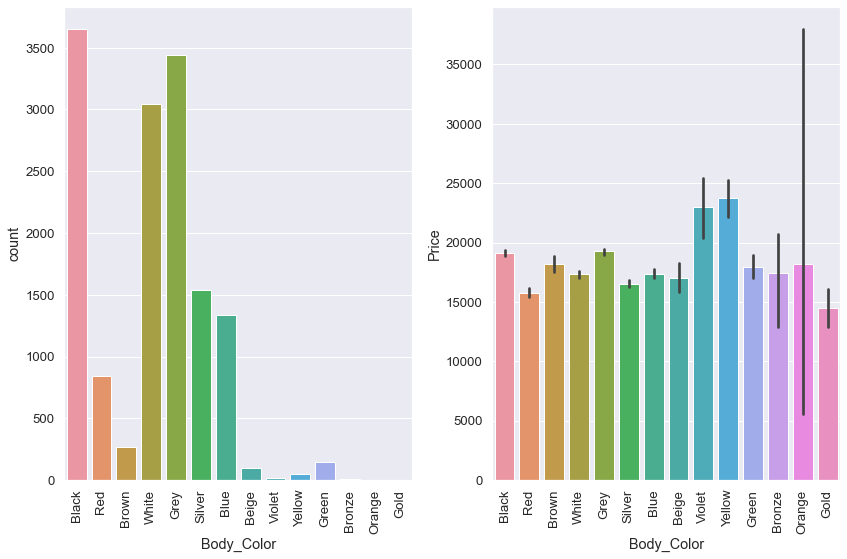

In [126]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Body_Color"],ax=ax[0]).set_xticklabels(sns.countplot(df["Body_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Body_Color", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Body_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

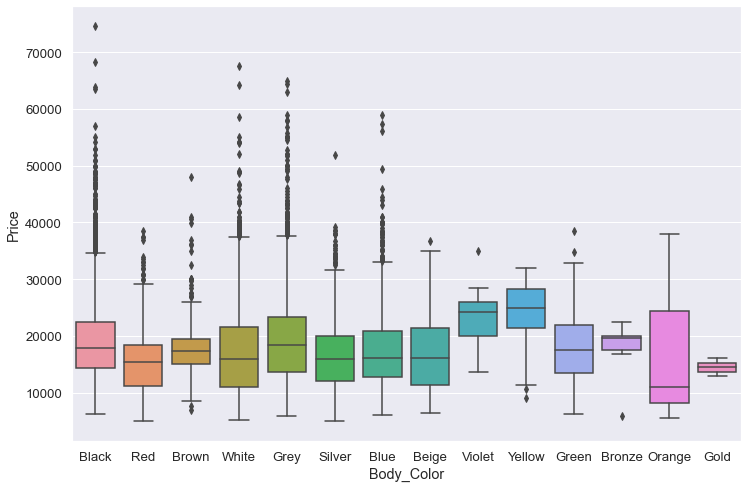

In [127]:
sns.boxplot(x="Body_Color", y="Price", data=df);

In [128]:
df.groupby(["Body_Color"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Body_Color,,,,,,,,
Beige,98.0,17031.969388,6594.619183,6499.000000,11440.000000,16115.000000,21445.000000,36771.0
Black,3648.0,19121.089638,7549.230980,6200.000000,14400.000000,17890.000000,22500.000000,74600.0
Blue,1334.0,17387.904048,7047.227830,5990.000000,12700.000000,16200.500000,20897.500000,58990.0
Bronze,6.0,17458.166667,5911.970921,5950.000000,17550.000000,19700.000000,19974.250000,22500.0
Brown,265.0,18204.430189,5782.060940,7000.000000,14990.000000,17400.000000,19500.000000,47990.0
Gold,2.0,14472.267857,2229.835981,12895.535714,13683.901786,14472.267857,15260.633929,16049.0
Green,149.0,17940.885906,6111.078086,6290.000000,13490.000000,17500.000000,21900.000000,38450.0
Grey,3438.0,19249.064900,7905.321141,5900.000000,13681.250000,18480.000000,23271.750000,64900.0
Orange,3.0,18166.666667,17347.438091,5555.000000,8275.000000,10995.000000,24472.500000,37950.0


#### Paint_Type

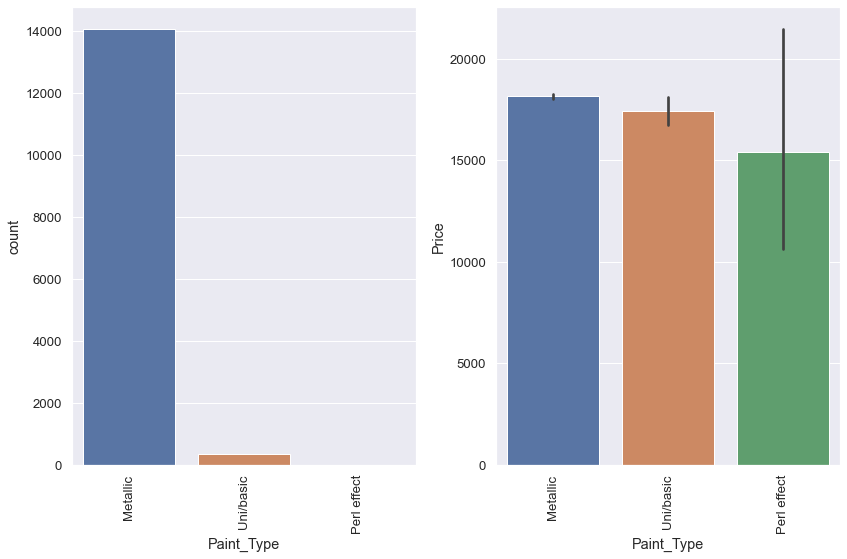

In [129]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Paint_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Paint_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Paint_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Paint_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

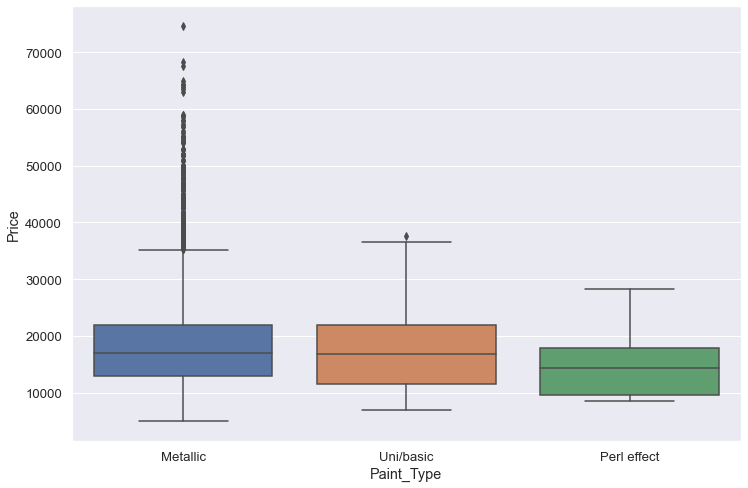

In [130]:
sns.boxplot(x="Paint_Type", y="Price", data=df);

In [131]:
df.groupby(["Paint_Type"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Paint_Type,,,,,,,,
Metallic,14085.0,18143.465329,7439.990797,4950.0,12980.0,16960.0,21900.0,74600.0
Perl effect,6.0,15428.333333,7520.285677,8500.0,9567.5,14400.0,17867.5,28290.0
Uni/basic,342.0,17432.660819,6530.404737,6899.0,11482.5,16900.0,21900.0,37599.0


In [132]:
df.drop(columns="Paint_Type", inplace=True)

#### Gear_Type

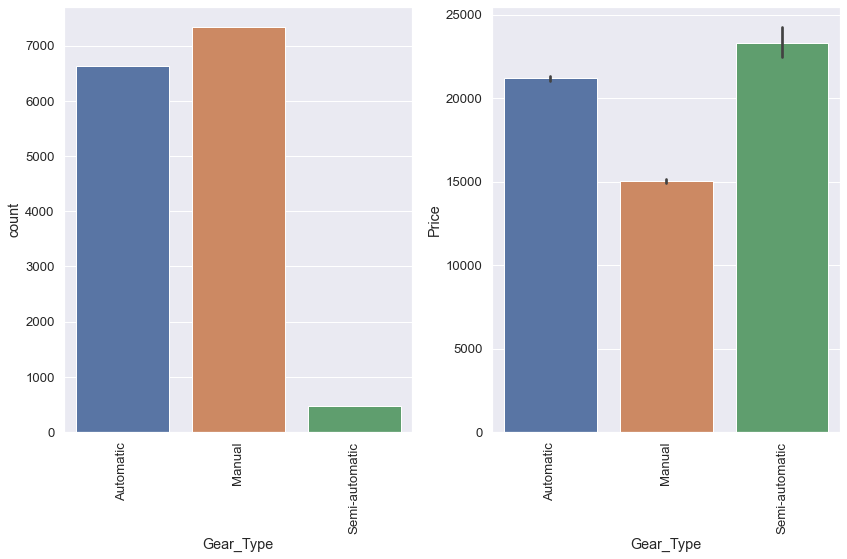

In [133]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Gear_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Gear_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Gear_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Gear_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

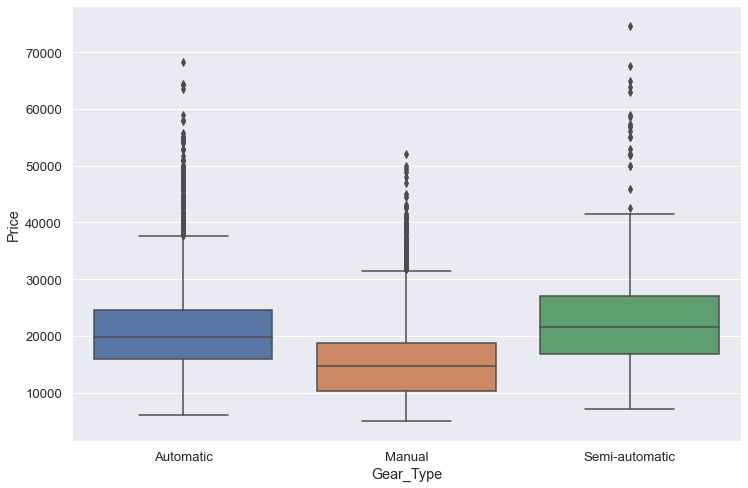

In [134]:
sns.boxplot(x="Gear_Type", y="Price", data=df);

In [135]:
df.groupby(["Gear_Type"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Gear_Type,,,,,,,,
Automatic,6635.0,21188.741673,7330.372653,6000.0,15922.5,19900.0,24652.5,68320.0
Manual,7333.0,15025.282989,5777.476526,4950.0,10300.0,14700.0,18799.0,52120.0
Semi-automatic,465.0,23306.554839,10192.544023,7200.0,16900.0,21500.0,27000.0,74600.0


#### Drive_Chain

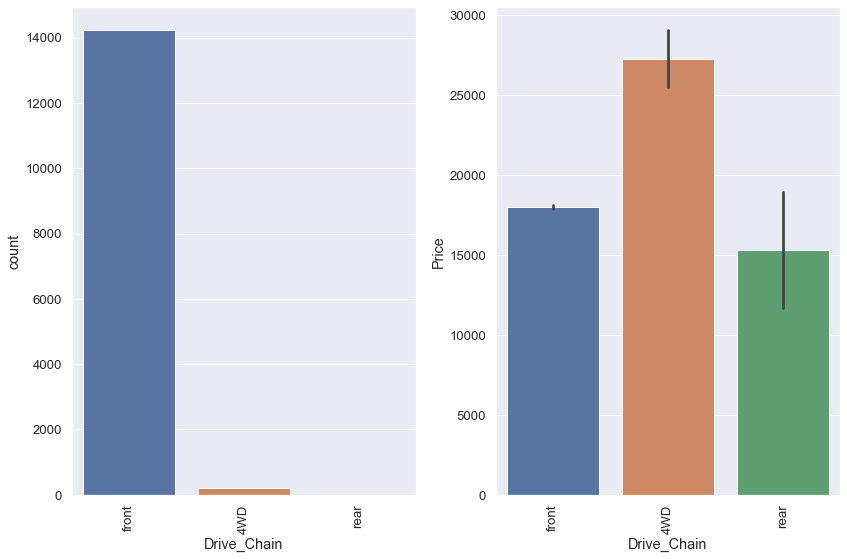

In [136]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Drive_Chain"],ax=ax[0]).set_xticklabels(sns.countplot(df["Drive_Chain"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Drive_Chain", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Drive_Chain"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

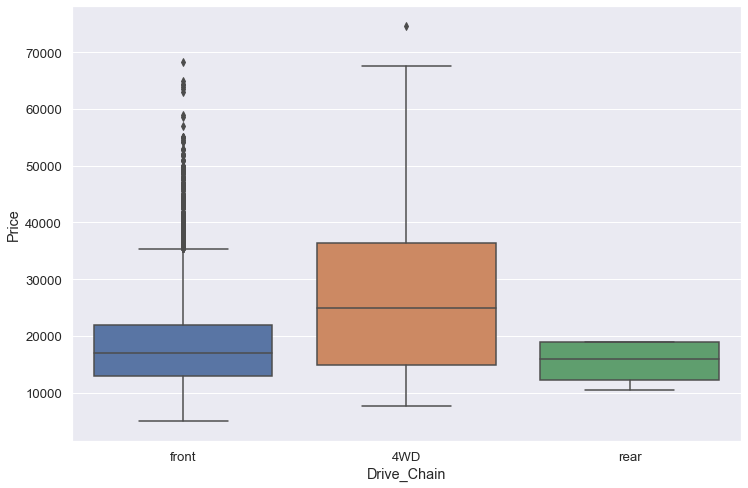

In [137]:
sns.boxplot(x="Drive_Chain", y="Price", data=df);

In [138]:
df.groupby(["Drive_Chain"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Drive_Chain,,,,,,,,
4WD,200.0,27248.760000,13657.506204,7700.0,14900.0,24990.0,36460.0,74600.0
front,14229.0,17998.043936,7214.492279,4950.0,12940.0,16949.0,21900.0,68320.0
rear,4.0,15332.500000,4313.949273,10490.0,12297.5,15925.0,18960.0,18990.0


In [139]:
df[df["Drive_Chain"] == "rear"]

,Model,Body_Type,Price,Vat,Km,Prev_Owner,Type,Body_Color,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
11031,Opel Insignia,Station wagon,12900.0,No_Discount,76000.0,1.0,Used,White,5.0,Manual,4.0,1664.0,rear,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Touch screen,Voice Control","ABS,Central door lock,Central door lock with r...",6.0,4.1,100.0,109.0,Cloth,Black,1.6,3.0,"(10000, 15000]","(60000, 100000]","(1600, 1800]","(90, 100]","(100.0, 120.0]"
11456,Opel Insignia,Sedans,18990.0,No_Discount,17887.0,1.0,Used,Red,5.0,Automatic,4.0,1613.0,rear,Benzine,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Touch screen,Voice ...","Adaptive headlights,Central door lock,Daytime ...",6.0,6.7,125.0,159.0,Full leather,Black,1.6,2.0,"(15000, 20000]","(15000, 30000]","(1600, 1800]","(120, 150]","(140.0, 160.0]"
12089,Opel Insignia,Station wagon,18950.0,No_Discount,24987.0,1.0,Used,Grey,5.0,Manual,4.0,1698.0,rear,Diesel,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,MP3,On-board co...","Alloy wheels,Sport seats","ABS,Central door lock,Daytime running lights,D...",6.0,5.8,125.0,152.0,Cloth,Grey,2.0,1.0,"(15000, 20000]","(15000, 30000]","(1600, 1800]","(120, 150]","(140.0, 160.0]"
14611,Renault Clio,Sedans,10490.0,No_Discount,27700.0,1.0,Used,Grey,5.0,Manual,4.0,1162.0,rear,Diesel,Euro 6,"Air conditioning,Cruise control,Navigation sys...","Bluetooth,CD player,Hands-free equipment,Radio...",Touch screen,"ABS,Central door lock,Central door lock with r...",5.0,4.0,55.0,104.0,Cloth,Grey,1.5,1.0,"(10000, 15000]","(15000, 30000]","(1000, 1200]","(50, 60]","(100.0, 120.0]"


In [140]:
for indexes in df[(df["Drive_Chain"] == "rear") & (df["Model"] == "Renault Clio")].index:
    df.loc[indexes, "Drive_Chain"] = df[df["Model"] == df["Model"][indexes]]["Drive_Chain"].mode()[0]

#### Fuel

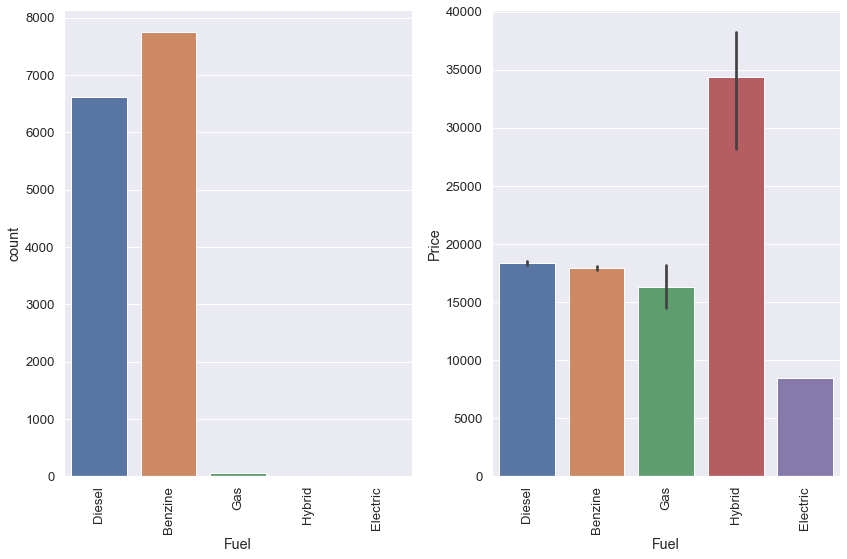

In [141]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Fuel"],ax=ax[0]).set_xticklabels(sns.countplot(df["Fuel"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Fuel", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Fuel"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

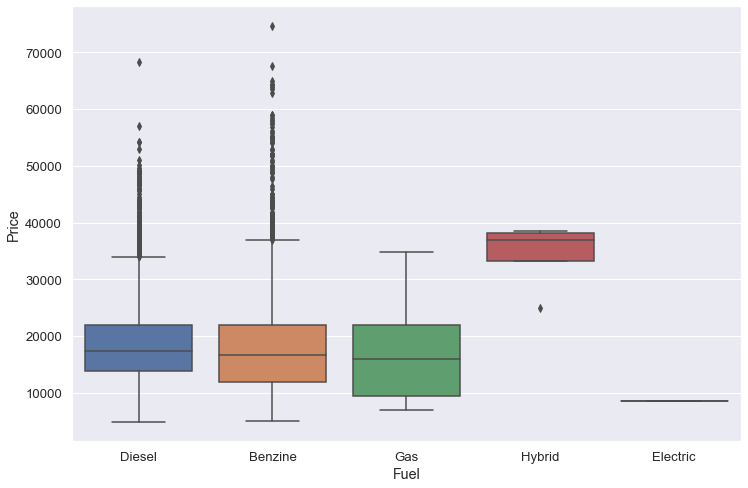

In [142]:
sns.boxplot(x="Fuel", y="Price", data=df);

In [143]:
df.groupby(["Fuel"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Fuel,,,,,,,,
Benzine,7746.0,17917.677790,7649.136108,4990.0,11990.00,16690.0,21990.0,74600.0
Diesel,6621.0,18377.367165,7123.558885,4950.0,13790.00,17450.0,21900.0,68320.0
Electric,1.0,8490.000000,NaN,8490.0,8490.00,8490.0,8490.0,8490.0
Gas,61.0,16271.803279,7439.968463,6950.0,9500.00,15900.0,22000.0,34738.0
Hybrid,4.0,34324.750000,6347.948507,24950.0,33161.75,36949.5,38112.5,38450.0


In [144]:
df[df["Fuel"] == "Electric"]

,Model,Body_Type,Price,Vat,Km,Prev_Owner,Type,Body_Color,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Upholstery_Color,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
13397,Renault Clio,Sedans,8490.0,No_Discount,23863.0,1.0,Used,White,5.0,Automatic,4.0,1208.0,front,Electric,Euro 6,"Air conditioning,Cruise control,Navigation system",On-board computer,Alloy wheels,Driver-side airbag,6.0,4.8,82.0,106.6,Unknown,Black,1.5,3.0,"(0, 10000]","(15000, 30000]","(1200, 1400]","(80, 90]","(100.0, 120.0]"


In [145]:
df.loc[df["Fuel"] == "Electric","Emission"] = 0

#### Emission_Class

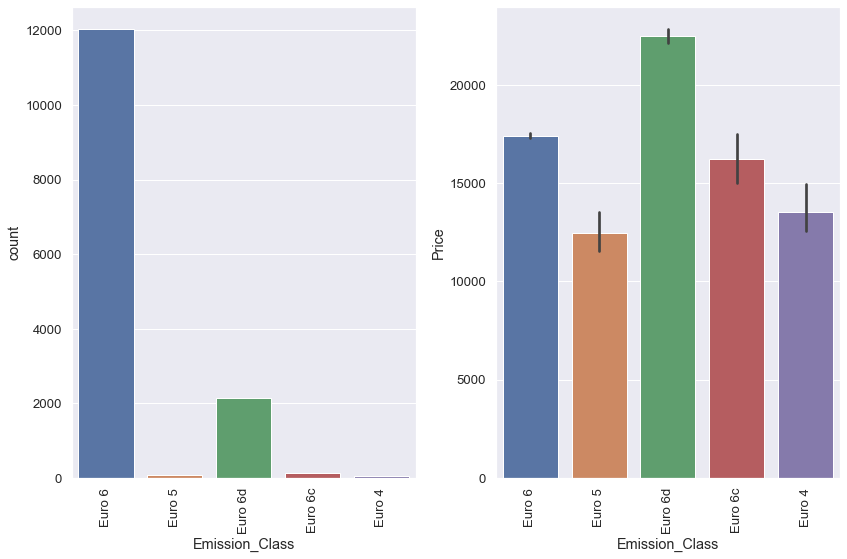

In [146]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Emission_Class"],ax=ax[0]).set_xticklabels(sns.countplot(df["Emission_Class"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Emission_Class", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Emission_Class"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

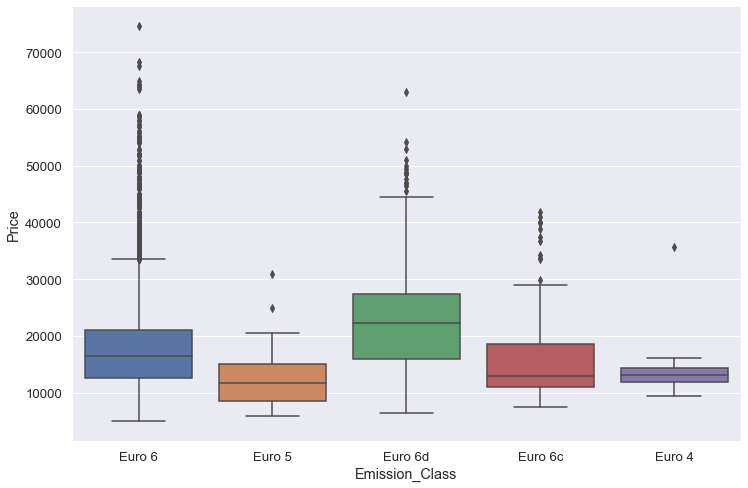

In [147]:
sns.boxplot(x="Emission_Class", y="Price", data=df);

In [148]:
df.groupby(["Emission_Class"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Emission_Class,,,,,,,,
Euro 4,42.0,13549.595238,3902.120381,9400.0,11900.0,13189.0,14399.0,35750.0
Euro 5,78.0,12472.500000,4527.424215,5970.0,8500.0,11700.0,14997.5,30980.0
Euro 6,12026.0,17419.090232,6936.070804,4950.0,12680.0,16500.0,20998.0,74600.0
Euro 6c,133.0,16219.473684,7740.128838,7499.0,11050.0,12950.0,18500.0,41899.0
Euro 6d,2154.0,22481.031586,8492.891185,6450.0,15950.0,22362.5,27410.0,62900.0


#### Upholstery_Type

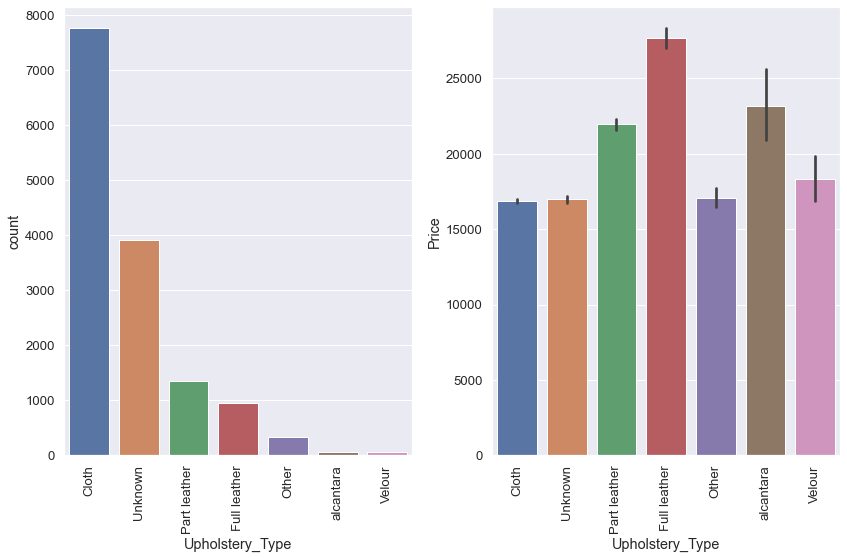

In [149]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Upholstery_Type"],ax=ax[0]).set_xticklabels(sns.countplot(df["Upholstery_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Upholstery_Type", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Upholstery_Type"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

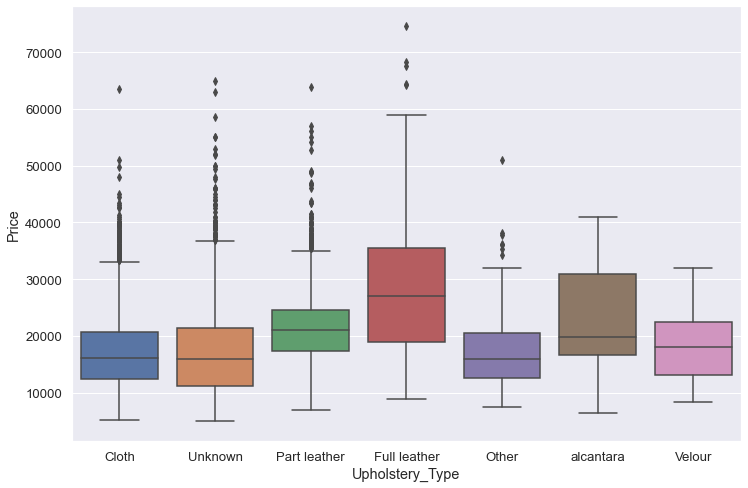

In [150]:
sns.boxplot(x="Upholstery_Type", y="Price", data=df);

In [151]:
df.groupby(["Upholstery_Type"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Upholstery_Type,,,,,,,,
Cloth,7759.0,16874.976624,5917.974783,5250.0,12495.00,16200.0,20750.00,63477.0
Full leather,952.0,27652.497899,10642.080594,8980.0,18849.75,26980.0,35478.75,74600.0
Other,334.0,17067.140719,5837.630558,7490.0,12572.50,15990.0,20500.00,50950.0
Part leather,1359.0,21947.002943,7180.194379,6999.0,17265.00,20979.0,24512.00,63900.0
Unknown,3914.0,16974.106422,7178.099035,4950.0,11199.25,15950.0,21450.00,64900.0
Velour,58.0,18320.827586,5801.573075,8290.0,13100.00,18090.0,22490.00,31990.0
alcantara,57.0,23183.596491,9373.519582,6490.0,16720.00,19840.0,30950.00,40990.0


#### Upholstery_Color

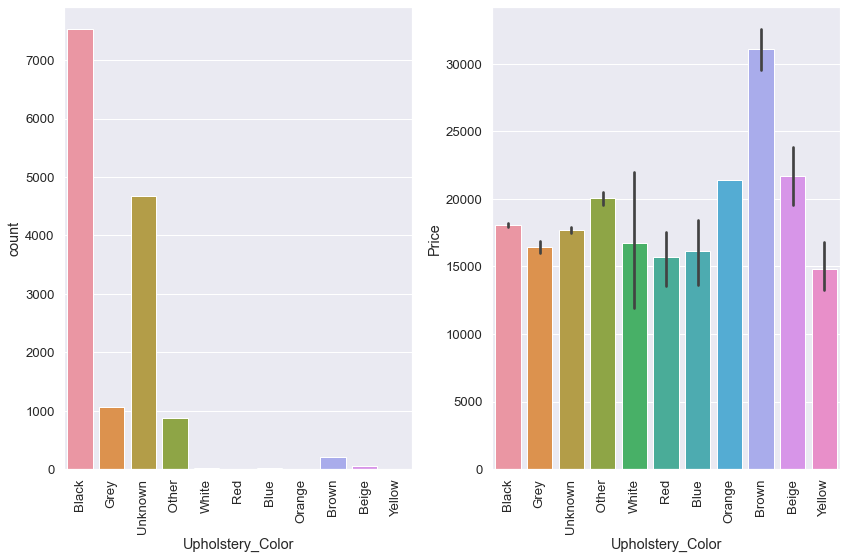

In [152]:
fig, ax = plt.subplots(1,2, figsize = (12,8))
sns.countplot(df["Upholstery_Color"],ax=ax[0]).set_xticklabels(sns.countplot(df["Upholstery_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
sns.barplot(x="Upholstery_Color", y="Price", data=df, ax=ax[1]).set_xticklabels(sns.countplot(df["Upholstery_Color"],ax=ax[0]).get_xticklabels(), 
                          rotation=90)
plt.xticks(rotation = 90)
plt.tight_layout()

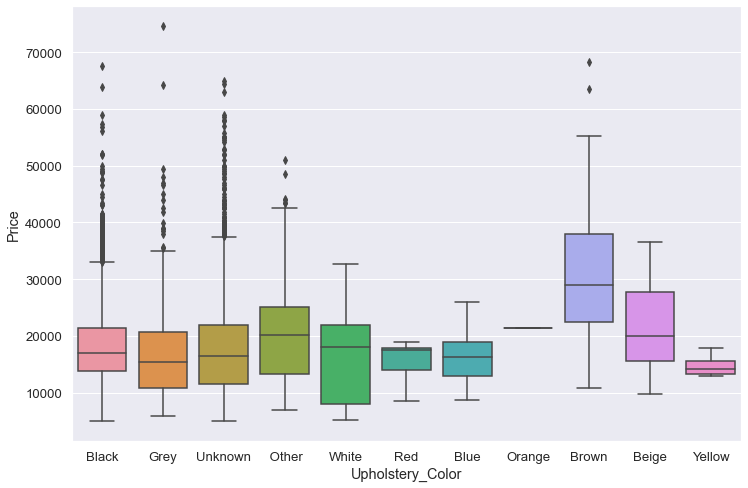

In [153]:
sns.boxplot(x="Upholstery_Color", y="Price", data=df);

In [154]:
df.groupby(["Upholstery_Color"]).describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Upholstery_Color,,,,,,,,
Other,874.0,20039.306636,7380.243506,6900.0,13277.50,20235.5,25075.0,50950.0
Beige,51.0,21670.862745,7715.587016,9700.0,15520.00,19950.0,27795.0,36500.0
Black,7535.0,18050.454230,6709.823264,4990.0,13750.00,16950.0,21480.0,67600.0
Blue,16.0,16143.000000,5071.398939,8750.0,12989.75,16300.0,18950.0,25900.0
Brown,201.0,31060.845771,10754.063466,10893.0,22500.00,28940.0,37990.0,68320.0
Grey,1056.0,16461.735795,7130.832784,5890.0,10900.00,15490.0,20615.0,74600.0
Orange,1.0,21400.000000,NaN,21400.0,21400.00,21400.0,21400.0,21400.0
Red,9.0,15704.444444,3293.076491,8500.0,13980.00,17440.0,17950.0,18880.0
Unknown,4673.0,17686.798103,7809.335796,4950.0,11490.00,16487.0,21900.0,64900.0


In [155]:
df.drop(columns="Upholstery_Color", inplace=True)

### End of the Handling Outliers

In [156]:
df.head().T

,0,1,2,3,4
Model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
Body_Type,Sedans,Sedans,Sedans,Sedans,Sedans
Price,15770.0,14500.0,14640.0,14500.0,16790.0
Vat,VAT deductible,Price negotiable,VAT deductible,No_Discount,No_Discount
Km,56013.0,80000.0,83450.0,73000.0,16200.0
Prev_Owner,2.0,1.0,1.0,1.0,1.0
Type,Used,Used,Used,Used,Used
Body_Color,Black,Red,Black,Brown,Black
Seat_Total,5.0,4.0,4.0,4.0,5.0
Gear_Type,Automatic,Automatic,Automatic,Automatic,Automatic


In [157]:
df[df.duplicated(keep=False)]

,Model,Body_Type,Price,Vat,Km,Prev_Owner,Type,Body_Color,Seat_Total,Gear_Type,Cylinders,Weight,Drive_Chain,Fuel,Emission_Class,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Gears,Consumption,Hp,Emission,Upholstery_Type,Engine_Size,Age,Price_Interval,Km_Interval,Weight_Interval,Hp_Interval,Emission_Interval
2,Audi A1,Sedans,14640.0,VAT deductible,83450.000000,1.0,Used,Black,4.0,Automatic,4.0,1332.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,3.8,85.0,99.0,Cloth,1.6,3.0,"(10000, 15000]","(60000, 100000]","(1200, 1400]","(80, 90]","(-0.1, 100.0]"
373,Audi A1,Sedans,14640.0,VAT deductible,83450.000000,1.0,Used,Black,4.0,Automatic,4.0,1332.0,front,Diesel,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",6.0,3.8,85.0,99.0,Cloth,1.6,3.0,"(10000, 15000]","(60000, 100000]","(1200, 1400]","(80, 90]","(-0.1, 100.0]"
1123,Audi A1,Sedans,19840.0,VAT deductible,5995.000000,1.0,Used,Grey,4.0,Automatic,3.0,1226.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Ele...","MP3,On-board computer","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Central door lock,Daytime running lights,D...",5.0,4.0,66.0,104.0,alcantara,1.4,1.0,"(15000, 20000]","(5000, 15000]","(1200, 1400]","(60, 70]","(100.0, 120.0]"
1124,Audi A1,Sedans,19840.0,VAT deductible,5995.000000,1.0,Used,Grey,4.0,Automatic,3.0,1226.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Ele...","MP3,On-board computer","Alloy wheels,Sport package,Sport seats,Voice C...","ABS,Central door lock,Daytime running lights,D...",5.0,4.0,66.0,104.0,alcantara,1.4,1.0,"(15000, 20000]","(5000, 15000]","(1200, 1400]","(60, 70]","(100.0, 120.0]"
2214,Audi A1,Compact,21190.0,VAT deductible,15.888889,0.0,New,White,5.0,Manual,3.0,1165.0,front,Benzine,Euro 6d,"Air conditioning,Armrest,Electrical side mirro...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.0,4.7,70.0,106.0,Cloth,1.0,0.0,"(20000, 25000]","(-1, 5000]","(1000, 1200]","(60, 70]","(100.0, 120.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15231,Renault Espace,Van,20900.0,VAT deductible,77931.000000,1.0,Used,Grey,5.0,Automatic,4.0,2471.0,front,Diesel,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Radio",Alloy wheels,"ABS,Adaptive headlights,Blind spot monitor,Cen...",6.0,4.7,118.0,120.0,Full leather,1.6,2.0,"(20000, 25000]","(60000, 100000]","(1800, 3000]","(100, 120]","(100.0, 120.0]"
15582,Renault Espace,Van,31265.0,VAT deductible,10.000000,0.0,New,White,5.0,Automatic,4.0,1685.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,Radio,USB","Alloy wheels,Catalytic Converter,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",7.0,6.8,165.0,153.0,Part leather,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(150, 200]","(140.0, 160.0]"
15583,Renault Espace,Van,31265.0,VAT deductible,10.000000,0.0,New,White,5.0,Automatic,4.0,1685.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,MP3,Radio,USB","Alloy wheels,Catalytic Converter,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",7.0,6.8,165.0,153.0,Part leather,1.8,0.0,"(30000, 80000]","(-1, 5000]","(1600, 1800]","(150, 200]","(140.0, 160.0]"
15632,Renault Espace,Van,29385.0,VAT deductible,21123.000000,1.0,Employee's car,Silver,7.0,Automatic,4.0,1685.0,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive Cruise Co

In [158]:
df.drop_duplicates(inplace=True)

In [159]:
for i in df.columns:
    first_look(i)

column name :  Model
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  9
Type of columns:  object
----------------------------------------
Unique values of columns:  ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
----------------------------------------
Audi A1           2393
Audi A2              1
Audi A3           2800
Opel Astra        2320
Opel Corsa        2041
Opel Insignia     2409
Renault Clio      1490
Renault Duster      34
Renault Espace     883
Name: Model, dtype: int64
----------------------------------------
Audi A3           2800
Opel Insignia     2409
Audi A1           2393
Opel Astra        2320
Opel Corsa        2041
Renault Clio      1490
Renault Espace     883
Renault Duster      34
Audi A2              1
Name: Model, dtype: int64
################################################################################

column name :  Body_Typ

Air conditioning                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  70
Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Sp

Number of Nulls  :  0
Number of Uniques:  6
Type of columns:  object
----------------------------------------
Unique values of columns:  ['(15000, 20000]' '(10000, 15000]' '(0, 10000]' '(20000, 25000]'
 '(30000, 80000]' '(25000, 30000]']
----------------------------------------
(0, 10000]        1878
(10000, 15000]    3488
(15000, 20000]    4245
(20000, 25000]    2803
(25000, 30000]    1056
(30000, 80000]     901
Name: Price_Interval, dtype: int64
----------------------------------------
(15000, 20000]    4245
(10000, 15000]    3488
(20000, 25000]    2803
(0, 10000]        1878
(25000, 30000]    1056
(30000, 80000]     901
Name: Price_Interval, dtype: int64
################################################################################

column name :  Km_Interval
----------------------------------------
Per_of_Nulls   :  % 0.0
Number of Nulls  :  0
Number of Uniques:  6
Type of columns:  category
----------------------------------------
Unique values of columns:  [(30000, 60000], (600

In [160]:
df.drop(columns=["Price_Interval","Km_Interval","Weight_Interval","Hp_Interval","Emission_Interval"], inplace=True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                14371 non-null  object 
 1   Body_Type            14371 non-null  object 
 2   Price                14371 non-null  float64
 3   Vat                  14371 non-null  object 
 4   Km                   14371 non-null  float64
 5   Prev_Owner           14371 non-null  float64
 6   Type                 14371 non-null  object 
 7   Body_Color           14371 non-null  object 
 8   Seat_Total           14371 non-null  float64
 9   Gear_Type            14371 non-null  object 
 10  Cylinders            14371 non-null  float64
 11  Weight               14371 non-null  float64
 12  Drive_Chain          14371 non-null  object 
 13  Fuel                 14371 non-null  object 
 14  Emission_Class       14371 non-null  object 
 15  Comfort_Convenience  14371 non-null 

In [162]:
df.to_csv("AutoScout_No_Outlier")